<div class="alert alert-success"> <b>Team lead's comment :</b> Dear Chezi! Thank you so much for this amazing work! I know that you poured your heart and soul into it and it's totlaly worth it! Amazing project! I enjoyed it a lot, you did soooo much, I didn't expect it) You clearly proved to be an amazing data analyst! Good luck with everything! </div>

# Product Range Analysis


By Chezi Mana<br>
March 2022


<a id="goal"></a>

---


# Introduction
This project is part of a final project to the Practicum100 Data analysis course by Yandex.
The project is about product range analysis of a large eCommerce service.

# Project goal:
Perform a prodocut range analysis on the data following the decompostion below.

<font size="5">[Link to Tableau Dashboard](https://public.tableau.com/shared/5DBCP59DY?:display_count=n&:origin=viz_share_link)</font>

<font size="5">[Link to presentation](https://www.canva.com/design/DAE674XCwyA/PDcUe-Sq9Y6R-_OxXZpPXw/view?utm_content=DAE674XCwyA&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)</font>

<a id="decomp"></a>

# Project decomposition

Project goal: Analyze product range and recommend improvements.
- Preprocess and examine the data:
    - [x] Data: size, Dtypes, distributions, etc.
    - [x] Check data for anomalies and decide how to treat them (missing values, duplicates. Etc.).
    - [x] An already known issue: missing and incorrect values in the item description.
        - [x] Current plan is to fix them using mode() on the stock code column.
- EDA and general questions:
    - [x] Is there a good way to categorize the data to find categories with high/low revenue?
        - [x] analyze categories
    - [x] What products have the highest and lowest revenue?
    - [x] What are the most popular items?
    - [x] Should we expand/exclude a certain product selection?
    - [x] Are there items that the average order depend on?
    - [x] Are there items that sell together in the same check?
- Test the hypotheses:
    - [x] Low priced items have revnue that is equal to average priced items.
    - [x] High priced items have greater revenue than average priced items.
- [x] Write General conclusions and recommendations.

<a id="toc"></a>

---

<font size="5"><u> **Table of Contents**</u></font>
- [Goal and introduction](#goal)
- [Project decomposition](#decomp)
- [Importing libraries and data](#import)
- [Description of the data](#desc)

---
<font size="4">**[The basics](#basics)**</font>
- [Observations](#basicobserv)
- [Duplicates](#duplicates)
    - [Conclusions](#duplicatesconc)
- [Missing values](#missing)
    - [Conclusions](#missingconc)
- [Investigating description](#investindesc)
    - [problem and solution](#Descriptionprob)
- [Date and why we don't want it](#date)

---
<font size="4">**[Anomalies](#anomalies)**</font>
- [Price outliers](#priceliers)
    - [Problem and solution](#poorguy)
- [Quantity outliers](#quantliers)
    - [Problem and solution](#quantlierssolution)
- [Invoice prefix](#invoiceprefix)
    - [Conclusions and solution](#invoiceprefixprob)
    
- [Adjustments and freebies](#freebies)
    - [Adjustments problem and solution](#adjustmentprob)
    
- [Irrelevant non product descriptions](#nonprods)
    - [Problem and solution](#nonprodsolution)
- [Anomalies conclusions](#anomconcs)
    
---
<font size="4">**[Preprocessing Table of contents](#prepro)**</font>
- [Removing charging mistakes](#wrongcharge)
- [Removing quantity mistakes](#quantittymists)
- [Removing date column](#datecol)
- [Replacing missing customer id](#missingcusts)
- [Removing prefixed invoices](#prefixfix)
- [Removing adjustments and freebies](#adjnfree)
- [Removing non-product description](#nodesc)
- [Adding the name column with one name per code](#addname)
- [Reorder columns and removing description](#reorderdesc)
- [Preprocessing summary](#preprosum)
    
---
    
<font size="4">**[Categorization](#categorize)**</font>


--- 
    
    
<font size="4">**[Category analysis table of contents](#catalysis)**</font>
- [Preparations](#catalysis)
- [Explaining ARPU](#arpu)
- [Products per category](#ppc)
- [Overall sold units](#overallsold)
- [Total revenue](#catotalrev)
- [Average revenue per category](#catavgrev)
- [Average revenue per product](#arpcc)
- [Very expensive products are mostly furniture](#morethan30)
- [Revenue per product in category](#revperprodcat)
- [Categories with products over 20k revenue](#20krev)
- [Summary and conclusions](#catconc)    
    
---
<font size="4">**[Hypotheses testing](#hypo)**</font>
- [Results and conclusions](#hypoconc)
    
---
<font size="4">**[Late EDA - Questions and answers](#questions)**</font>
- [What products sell together in the same purchase?](#aprior)
    - [Answer: The same items sell together in different style or color](#aprioriconc)
    
    
- [What price range actually has better revenue per product?](#qprice)
    - [Anwer: Higher price range brings more revenue](#apricerange)
    
    
- [What is the connection between revenue, quantity, and price?](#qconnections)
    - [Answer: Revenue and Quantity are highly correlated.](#aconnections)
   
   
- [What are the most popular items?](#qpop)
    - [Answer: Popcorn holder, WW2 Gliders, Jumbo bag retrospot design](#apop)
    
    
- [What products have the most revenue?](#qrev)
    - [Answer: Regency Cakestand, T-light holder, Party bunting](#arev)
  
  
- [Are there items that the average order depend on?](#qdepends)
    - [Answer: Some products appear in more than 10% of invoices](#adepends)
    
    
- [What kind of products should we expand the selection of?](#qexpand)
    - [Answer: How to choose products to expand](#aexpand)
  
  
- [Should certain items be excluded from the shop?](#exclude)
    - [Answer: It is recommended to exclude all these items that sold a revenue of less than 50](#aexclude)

---


<font size="5">**[General conclusions and recommendations](#generalelectric)**</font>

---

<a id="import"></a>
[Back to table of contents](#toc) 

---

## Importing Libraries
The Invoice_Date column is read as a date column type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import scipy.stats as stats


! pip install -q --user seaborn
import seaborn as sns


! pip install -q --user mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Reading data as such:
- Changing it's column names to a more friendly version:
    - Originial column names: [`InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`]
    - Changed column names: [`invoice`, `code`, `description`, `quantity`, `date`, `price`, `customer`]
- Setting the `date` column as date type.

In [2]:
try:
    ecom = pd.read_csv('ecommerce_dataset_us.csv', sep = '\t', header = 0,
            names = ['invoice', 'code', 'description', 'quantity', 'date', 'price', 'customer'],
            parse_dates = ['date'])
except:
    ecom = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t', header = 0,
            names = ['invoice', 'code', 'description', 'quantity', 'date', 'price', 'customer'],
            parse_dates = ['date'])

<a id="desc"></a>
[Back to table of contents](#toc) 

---

## Description of the data
The dataset contains the transaction history of an online store that sells household goods.

It contains the following columns:
- `invoice` — order identifier.
- `code` — item identifier.
- `description` — item name (BUT not always, sometimes the description is sale status, more on this later).
- `quantity`
- `date` — order date.
- `price` — price per item.
- `customer` — cutomer identifier.

<a id="basics"></a>
[Back to table of contents](#toc) 

---

## The basics

In [3]:
ecom.shape

(541909, 7)

In [4]:
ecom.sample(4)

,invoice,code,description,quantity,date,price,customer
528421,580729,22840,ROUND CAKE TIN VINTAGE RED,1,2019-12-03 17:24:00,15.79,NaN
222858,556459,82583,HOT BATHS METAL SIGN,1,2019-06-08 17:25:00,4.13,NaN
357483,568095,90022,EDWARDIAN DROP EARRINGS JET BLACK,4,2019-09-21 14:49:00,3.75,14911.0
99010,544691,22138,BAKING SET 9 PIECE RETROSPOT,3,2019-02-21 09:09:00,4.95,13804.0


In [5]:
ecom.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
invoice        541909 non-null object
code           541909 non-null object
description    540455 non-null object
quantity       541909 non-null int64
date           541909 non-null datetime64[ns]
price          541909 non-null float64
customer       406829 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.3 MB


In [6]:
ecom.describe(include = 'all')

,invoice,code,description,quantity,date,price,customer
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000
unique,25900,4070,4223,NaN,23260,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2019-10-29 14:41:00,NaN,NaN
freq,1114,2313,2369,NaN,1114,NaN,NaN
first,NaN,NaN,NaN,NaN,2018-11-29 08:26:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 12:50:00,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000


<a id="basicobserv"></a>
[Back to table of contents](#toc) 

---

### Basic observations
- There are 541,909 rows in the data, each row resembles a transaction (or return) of items.
- From the describe method we can already tell:
    - There are very big outliers in:<br>
        - `price`: The lowest price is -11062, and highest is 12,346, these numbers surely don't match the avg(4.6), median(2.08) and std(96.75).
        - `quantity`: The lowest quantity is -80,995 and largest is 80,995, they both are really really high and they are also the exact same number. <br>
        Again far from the average (9.55), median (3), and std (218).
    - There are 4,223 descriptions, yet 4,070 codes. the amount of unique rows should match since every item should have a unique description and unique code.
    - There is a total of 25900 invoices.
    - The data range is from Nov-29 2018 to Dec-07 2019.
    - The median price per item purchased is 2.

<a id="duplicates"></a>
[Back to table of contents](#toc) 

---

## Duplicates

In [7]:
print('There are {:,} duplicated rows in the data.'.format(ecom.duplicated().sum()))
print('This is {:.2%} of the data.'.format(ecom.duplicated().sum() / len(ecom)))

There are 5,268 duplicated rows in the data.
This is 0.97% of the data.


### Example for duplicated rows:

In [8]:
#showing duplicated rows, sort by invoice, code, and date
ecom[ecom.duplicated(keep = False)].sort_values(by = ['invoice', 'code', 'date']).head(20)

,invoice,code,description,quantity,date,price,customer
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2018-11-29 11:49:00,1.65,17920.0
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2018-11-29 11:49:00,1.65,17920.0


### Example of legitimate duplications in invoice 536412:

In [9]:
print('Example for duplicates whithin the same invoice:')
ecom[ecom['invoice'] == "536412"].sort_values('description').head(10) #find and show first 10 rows of invoice 536412

Example for duplicates whithin the same invoice:


,invoice,code,description,quantity,date,price,customer
611,536412,22900,SET 2 TEA TOWELS I LOVE LONDON,2,2018-11-29 11:49:00,2.95,17920.0
617,536412,22900,SET 2 TEA TOWELS I LOVE LONDON,2,2018-11-29 11:49:00,2.95,17920.0
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2018-11-29 11:49:00,1.65,17920.0
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2018-11-29 11:49:00,1.65,17920.0
604,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2018-11-29 11:49:00,1.65,17920.0
601,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2018-11-29 11:49:00,1.65,17920.0
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2018-11-29 11:49:00,1.65,17920.0
580,536412,22242,5 HOOK HANGER MAGIC TOADSTOOL,5,2018-11-29 11:49:00,1.65,17920.0
583,536412,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,1,2018-11-29 11:49:00,1.65,17920.0
576,536412,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,3,2018-11-29 11:49:00,1.65,17920.0


<a id="duplicatesconc"></a>
[Back to table of contents](#toc) 

---

### There are 5268 duplicate rows. These take only 0.97% of the data.
It looks like these duplicates are probably items that were passed one after another without aggregation.<br>
A good example to it as printed above; looking at invoice 536412, which has the same item ("12 daisy pegs in a wood box") passed 5 times, with varying quantities of 1 or 2.

<a id="missing"></a>
[Back to table of contents](#toc) 

---

## Missing values
There are missing values; 1,454(0.27% of data) in `description` and 135,080 in `customer` (24.93% of data) columns.

In [10]:
ecom.isnull().sum()

invoice             0
code                0
description      1454
quantity            0
date                0
price               0
customer       135080
dtype: int64

In [11]:
print('There are {:,} missing values in the description column. {:.2%} of the data.'.format(
    ecom['description'].isnull().sum(), ecom['description'].isnull().sum() / len(ecom)))
print('There are {:,} missing values in the customer column. {:.2%} of the data.'.format(
    ecom['customer'].isnull().sum(), ecom['customer'].isnull().sum() / len(ecom)))

There are 1,454 missing values in the description column. 0.27% of the data.
There are 135,080 missing values in the customer column. 24.93% of the data.


### Sample of 5 rows with missing values in `customer` column, but filled values in `description`:

In [12]:
ecom[(ecom['customer'].isnull()) & (ecom['description'].notnull())].sample(5)

,invoice,code,description,quantity,date,price,customer
351560,567667,23159,SET OF 5 PANCAKE DAY MAGNETS,1,2019-09-19 15:24:00,4.13,NaN
394198,570871,22581,WOOD STOCKING CHRISTMAS SCANDISPOT,1,2019-10-10 16:36:00,0.83,NaN
172459,551537,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,1,2019-05-01 08:37:00,4.25,NaN
501282,578827,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2019-11-23 14:25:00,2.46,NaN
402794,571508,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2019-10-15 15:27:00,6.63,NaN


### Sample of 5 rows with missing values in `description`:

In [13]:
ecom[(ecom['description'].isnull())].sample(5)

,invoice,code,description,quantity,date,price,customer
148112,549176,35603B,NaN,-12,2019-04-04 17:31:00,0.0,NaN
52217,540696,84562A,NaN,1,2019-01-09 09:14:00,0.0,NaN
74645,542510,21667,NaN,2,2019-01-26 12:07:00,0.0,NaN
331029,565938,23066,NaN,-13,2019-09-06 10:54:00,0.0,NaN
395152,571013,23306,NaN,-104,2019-10-11 12:16:00,0.0,NaN


### All rows that have missing values in `description` column, also have missing values in `customer` column:

In [14]:
print('The number of rows that has filled values in `customer` yet missing values in `description` is {}.'.format(
    len(ecom[(ecom['description'].isnull()) & (ecom['customer'].notnull())])))
print('In other words any 100% of the rows with missing values in `description` also has missing values in `customer`.')

The number of rows that has filled values in `customer` yet missing values in `description` is 0.
In other words any 100% of the rows with missing values in `description` also has missing values in `customer`.


### Notice how many of the values in the `quantity` column in this case are below 0:

In [15]:
print('There are {} rows where quantity is below 0 and the `description` column has empty values.'.format(
    len(ecom[(ecom['description'].isnull()) & (ecom['quantity'] < 0)])))
print('There are {} rows where quantity is equal to 0 and the `description` column has empty values.'.format(
    len(ecom[(ecom['description'].isnull()) & (ecom['quantity'] == 0)])))
print('There are {} rows where quantity is above 0 and the `description` column has empty values.'.format(
    len(ecom[(ecom['description'].isnull()) & (ecom['quantity'] > 0)])))

There are 862 rows where quantity is below 0 and the `description` column has empty values.
There are 0 rows where quantity is equal to 0 and the `description` column has empty values.
There are 592 rows where quantity is above 0 and the `description` column has empty values.


### Notice how all of missing values in `description` have a `price` of 0:

In [16]:
ecom[(ecom['description'].isnull())]['price'].value_counts()

0.0    1454
Name: price, dtype: int64

<a id="missingconc"></a>
[Back to table of contents](#toc) 

---

### Conclusions about missing values
`customer` missing values:
- One can expect that in an E-shop, all customers should have an id. Even if they payed through a service such as ebay, there should be an ebay customer id. This is not the case in our data.
- With that said, most rows with missing customer id are legitimate purchases. More on none-legitimate rows later in the Analysis.

`description` missing values:
- All rows with missing values in `description` column also have missing values in `customer` column.
- All rows with missing values in `description` column have price value of 0.
- Many of the rows with missing values have negative value in `quantity`.
-- All this may lead to these transactions being adjustments, cancelations, gifts, etc.  more on this soon.

#### `customer` missing values problem:
The missing values in the `customer` column cause a decimal point of 0 in the values (for example: 8234.0). <br>
This is not only ugly and unnecessary, but also takes up a little more memory.
#### `customer` missing values solution:
The missing values will be filled with "0"

#### `description` missing values problem:
Actually. with all missing values on this column being adjustements of some sort, they will be removed from the data either way.
#### `description` missing values solution:
In any case, as written in the conclusions of "investigating description" part of the analysis, a new `name` column will be created and should any values be missing they will be filled with "none" value.

<a id="investindesc"></a>
[Back to table of contents](#toc) 

---

## Investigating `description`

### Custom descriptions:
Descriptions are written in uppercase or in lowercase letters:<br>
It looks like values that are written in lowercase letters are informal or custom, and usually point to the explaining the input. <br>While values that are written in uppercase are formal item descriptions.

In [17]:
print('There are {:,} unique descriptions.'.format(ecom['description'].nunique()))
print('{} of the values are the same, just duplications of lowercase / uppercase letters.'.format(ecom['description'].nunique() - ecom['description'].str.lower().nunique()))

There are 4,223 unique descriptions.
17 of the values are the same, just duplications of lowercase / uppercase letters.


In [18]:
dropnadesc = ecom['description'].dropna()  #dropping missing values so that uppercase and lowercase strings can be checked

print('Descriptions that are in lowercase:\n')
print(dropnadesc[dropnadesc.str.islower()].value_counts().head(10))   #show unique lowercase descriptions

print('\n\n\nDescriptions that are in uppercase:\n')
print(dropnadesc[dropnadesc.str.isupper()].value_counts().head(10))  #show unique uppercase descriptions

Descriptions that are in lowercase:

check                    159
damages                   45
damaged                   43
found                     25
sold as set on dotcom     20
adjustment                16
thrown away                9
amazon                     8
dotcom                     6
damages?                   5
Name: description, dtype: int64



Descriptions that are in uppercase:

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: description, dtype: int64


### Some stock codes have multiple `description`
- This is because the `description` value is sometimes changed into a custom value to explain the intput status
- There are up to 8 different descriptions for the same code:

In [19]:
multidesc = (ecom.groupby('code')['description'].nunique()  #show 10 codes with most different descriptions count
             .sort_values(ascending = False).reset_index().rename(columns = {'description':'descriptions'}))

display(multidesc.head(10))

print('There are {:,} codes with more than one description. Out of {} unique codes.'.format(
                                                                (multidesc['descriptions'] > 1).sum(), ecom['code'].nunique()))

,code,descriptions
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
5,72807A,5
6,23343,5
7,21181,5
8,23131,5
9,23196,4


There are 650 codes with more than one description. Out of 4070 unique codes.


#### For example, code 20713 has 7 different `description` values of different status *other* than it's product name:

In [20]:
ecom[ecom['code'] == "20713"]['description'].value_counts()

JUMBO BAG OWLS                  673
wrongly coded-23343               1
wrongly marked 23343              1
wrongly coded 23343               1
Found                             1
Marked as 23343                   1
found                             1
wrongly marked. 23343 in box      1
Name: description, dtype: int64

<a id="Descriptionprob"></a>
[Back to table of contents](#toc) 

---

### Problem:
Some items have different names on their `description`. But also have useful information on the transaction.

#### Solution:
Since `desciption` may help identify a purchase status, such as damaged return, or sold through amazon etc., and changing values may remove these status, a new column will be created by the name of `name` and in it a fixed version of the old `description` (fixed by taking the most frequent value of `description` out of groupby of `code`). should any values be missing they will be filled with "none" value.

<a id="date"></a>
[Back to table of contents](#toc) 

---

<div class="alert alert-success"> <b>+  </div>

## `Date`

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


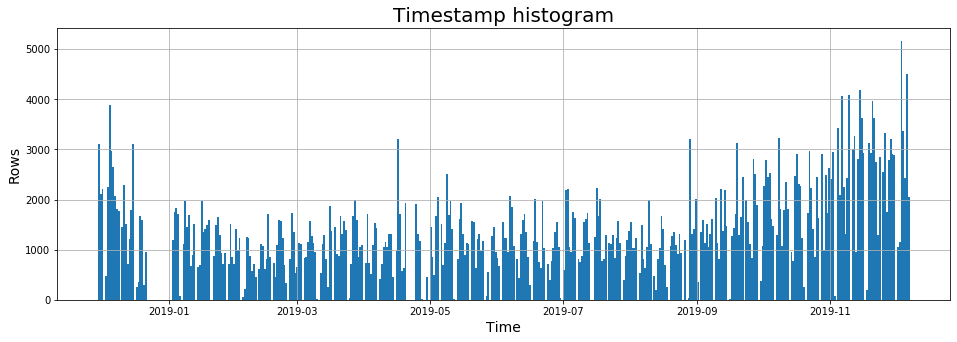

In [21]:
ecom['date'].hist(bins = 450, figsize = (16, 5))
plt.title('Timestamp histogram', fontsize=20)
plt.ylabel('Rows', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.show()

- Some timestamp facts:
    - Timestamp is recorded by rounded minutes.
    - Times with most sales:
        - Month: Dec has most purchases. Just right for the holiday season.
        - Week days: Wednesday to Friday have the most purchases.
        - Time of day: 10am to 4pm Have the most purchases.
    - No Purchases are recorded at night (9pm and 6am) or on Sundays.
    
    
    
That being said and played.......
### Problem:
This analysis will focus on the year-long purchases, <br>
Therefore timestamp is irrelevant.

#### Solution:
It is best to remove the column so the data will be cleaner and lighter.

<div class="alert alert-warning"> <b>Team lead's comment:</b> Well, timestamp isn't fully useless, we could have used it in statistical tests or in seasonality analysis ;)  </div>

<a id="anomalies"></a>
[Back to table of contents](#toc) 

---

## Anomalies

### Outliers <br> There are some major outliers in both `quantity`, and `price`:

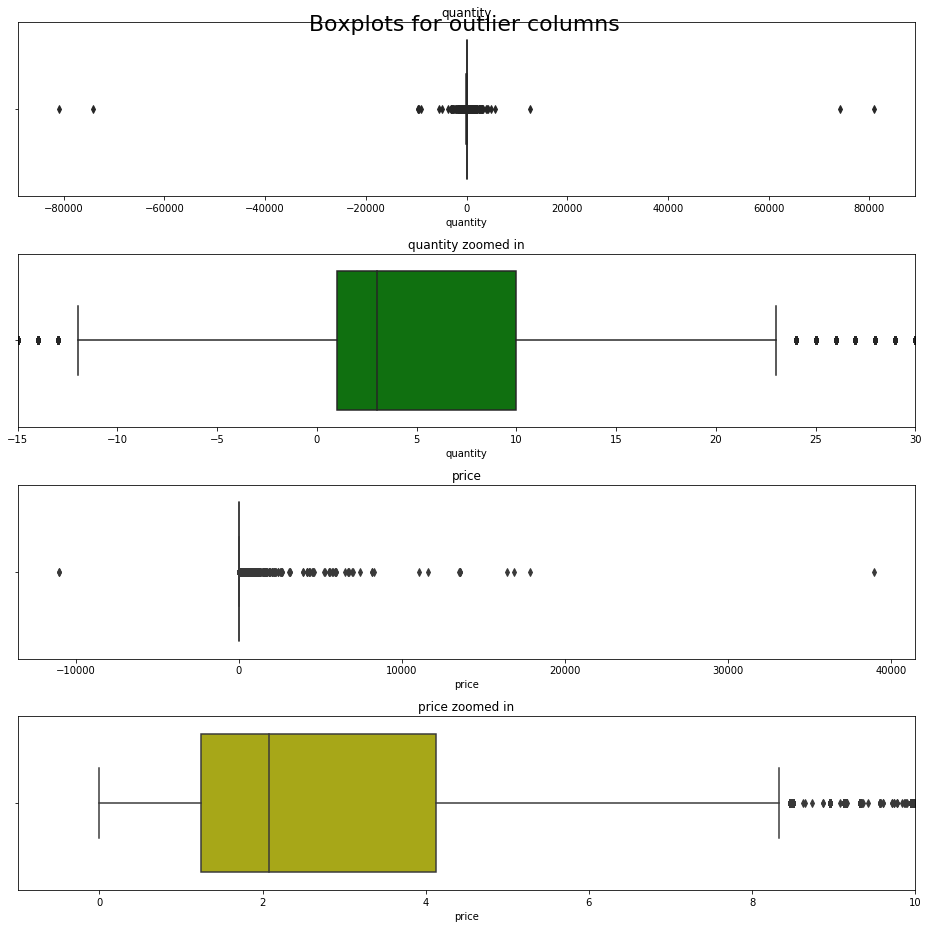

In [22]:
figure, axs = plt.subplots(nrows = 4, figsize = (13,13))
quantitybox = sns.boxplot(x = ecom['quantity'], ax = axs[0], color = 'g').set(title ='quantity')
quantityboxzoom = sns.boxplot(x = ecom['quantity'], ax = axs[1], color = 'g').set(title ='quantity zoomed in', xlim = (-15, 30))
pricebox = sns.boxplot(x = ecom['price'], ax = axs[2], color = 'y').set(title ='price')
priceboxzoom = sns.boxplot(x = ecom['price'], ax = axs[3], color = 'y').set(title ='price zoomed in', xlim = (-1, 10))
figure.suptitle("Boxplots for outlier columns", fontsize = 22)
figure.tight_layout()
plt.show()

<a id="priceliers"></a>
[Back to table of contents](#toc) 

---

### Looking into very high `price` of items:

In [23]:
ecom[ecom['price'] > 500].drop_duplicates(subset='description')

,invoice,code,description,quantity,date,price,customer
1814,536544,DOT,DOTCOM POSTAGE,1,2018-11-29 14:32:00,569.77,NaN
14392,537534,M,Manual,1,2018-12-05 11:48:00,924.59,NaN
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:04:00,13541.33,NaN
28992,C538680,BANK CHARGES,Bank Charges,-1,2018-12-11 17:10:00,966.92,NaN
150591,C549452,D,Discount,-1,2019-04-06 14:17:00,1867.86,17940.0
173277,C551685,POST,POSTAGE,-1,2019-05-01 12:51:00,8142.75,16029.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.50,15098.0
242589,C558359,S,SAMPLES,-1,2019-06-26 15:10:00,570.00,NaN
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN
351003,C567655,CRUK,CRUK Commission,-1,2019-09-19 14:40:00,608.66,14096.0


#### It seems most items are actually cancelations or credits
- Credits will be removed later in the analysis so we don't need to worry about them.
- There is one item that has a `quantity` of 60 and `price` of 649.50; "picnic basket wicker 60 pieces".

### Checking all transactions made by the same customer who had a purchase of 60 picnic baskets for the price of 649.50 each:

In [24]:
ecom[ecom['customer'] == 15098.0]

,invoice,code,description,quantity,date,price,customer
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2019-06-08 15:22:00,4.95,15098.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.50,15098.0
222681,C556445,M,Manual,-1,2019-06-08 15:31:00,38970.00,15098.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.50,15098.0
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2019-06-08 15:39:00,4.95,15098.0


<a id="poorguy"></a>

---

#### The poor customer:
- Got charged right the first time:
    - One purchase for `quantity` of 60 pieces of small wicker baskets, for `price` of 4.95 each. this is total of 297.
- Then.. there is another charge, maybe first time there was a mistake in price?
    - For `quantity` of 60 units of (notice the number in the name): "PICNIC BASKET WICKER 60 PIECES". 60 times 60? for the `price` of 649.50.  not good!
- Then, it is being credited later with manual entry for `quantity` of -1, `price` of 38970 (this is the sum of 60 * 649.50 from before). ok!
- Then; ok we can get it right this time! another transaction for `quantity` of 1 and `price` of 649.50. there we go!
- Then lets not forget to also cancel the first purchase that was probably priced wrong.

Perhaps this customer deserves a compensation? lets just make sure it is not another small picnic wicker basket.
<a id="link_for_toc"></a>

### Problem:<br>
- Bottom line is that we have outliers and errors in transaction inputs.
    - The other `price` outliers will be removed in the coming preprocessing steps when removing credits.
    
#### Solution:
- All entries must be removed from analysis
    - Leaving only the first row with `quantity` of 60 and `price` of 4.95. Even if the price might have been wrong.

<a id="quantliers"></a>
[Back to table of contents](#toc) 

---

### Looking into of very high `quantity` of items:
- Although the majority of `quantity` values are from 1 to 10. There are quite a few with also higher values.

In [25]:
print('There are {:,} transactions where quantity is between 100 and 2000.'.format(len(ecom.query('2000 > quantity > 100'))))
display(ecom.query('4000 > quantity > 100').sort_values('quantity').tail(10))

There are 4,920 transactions where quantity is between 100 and 2000.


,invoice,code,description,quantity,date,price,customer
201149,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2019-05-21 13:08:00,0.42,12901.0
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2018-11-30 17:38:00,0.18,16754.0
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2019-08-02 18:06:00,1.45,12931.0
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2019-10-31 11:24:00,0.32,16308.0
115807,546139,84988,?,3000,2019-03-07 16:35:00,0.00,NaN
263885,560040,23343,came coded as 20713,3100,2019-07-12 14:28:00,0.00,NaN
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-04-16 13:20:00,2.10,15749.0
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-01-09 12:55:00,2.10,15749.0
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2019-07-17 17:04:00,0.06,14609.0
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2019-02-20 10:43:00,0.82,18087.0


#### It looks like a very high `quantity` of items is legitimate
- Most of entries with high quantities are of cheap items.
- Some of the rows will be removed in preprocessing stage as they are adjustments or cancellations.
- However There are transactions with `quantity` of 74,215 and 80,995 items that are just TOO high!

In [26]:
ecom[ecom['quantity'] > 4000].sort_values('quantity', ascending = False) #find those quantities above 4000

,invoice,code,description,quantity,date,price,customer
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2019-11-23 15:57:00,0.00,13256.0
74614,542504,37413,NaN,5568,2019-01-26 12:03:00,0.00,NaN
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901.0
206121,554868,22197,SMALL POPCORN HOLDER,4300,2019-05-25 10:52:00,0.72,13135.0


### Following the customers who have such huge quantities:

In [27]:
ecom[ecom['customer'].isin([12346.0, 16446.0])].sort_values('invoice')

,invoice,code,description,quantity,date,price,customer
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2019-05-16 09:52:00,1.65,16446.0
194355,553573,22982,PANTRY PASTRY BRUSH,1,2019-05-16 09:52:00,1.25,16446.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446.0


<a id="quantlierssolution"></a>

---

### Problem:
- `quantity` has two values of 74,215, and 90,995 that are too high.
    - They also seem to be credits on previous purchase with the same quantities, mistake? maybe..
    
#### Solution:
- Althought in later preprocessing credits will be removed, the purchase made before them would not. It should be removed by hand.

<a id="invoiceprefix"></a>
[Back to table of contents](#toc) 

---

### `Invoice` column has 3 different types of invoice:

In [28]:
ecom['invoice'].astype(str).str[0].value_counts()  #show value counts only for first invoice letter

5    532618
C      9288
A         3
Name: invoice, dtype: int64

#### Normal invoices with only raw numbers (starting with "5")
For example:

In [29]:
display(ecom[ecom['invoice'].str.contains('^\d')].sample(3))
print('There are {:,} rows with no prefix.'.format(len((ecom[ecom['invoice'].str.contains('^\d')])))) #counting rows
print('These are {:.2%} of the data.'.format(len((ecom[ecom['invoice'].str.contains('^\d')])) / len(ecom)))

,invoice,code,description,quantity,date,price,customer
282642,561651,84637,KITCHEN FLOWER POTS WALL PLAQUE,2,2019-07-26 15:36:00,4.96,NaN
316269,564753,23166,MEDIUM CERAMIC TOP STORAGE JAR,12,2019-08-28 10:20:00,1.25,13709.0
290988,562420,23297,SET 40 HEART SHAPE PETIT FOUR CASES,1,2019-08-02 16:38:00,3.29,NaN


There are 532,618 rows with no prefix.
These are 98.29% of the data.


#### Invoices with 'A' as a prefix

In [30]:
display(ecom[(ecom['invoice'].str[0] == 'A')])
print('there are {:,} rows with "A" prefix.'.format(len((ecom[(ecom['invoice'].str[0] == 'A')])))) #counting rows
print('These are {:.5%} of the data.'.format(len((ecom[(ecom['invoice'].str[0] == 'A')])) / len(ecom)))

,invoice,code,description,quantity,date,price,customer
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


there are 3 rows with "A" prefix.
These are 0.00055% of the data.


#### Problem:
- There are only 3 rows with prefix of 'A'.
- All 3 rows are of the same adjustment known as "Adjust bad debt", and we already know about this as an adjustment made for book keeping.
- These rows are also the only negative values in the `price` column.
- Notice this adjustment has one positive value, and 2 negative values, all of the same amount.
    - The first positive input was probably a mistake (meant to be a negative input). <br>
    Then two negative inputs had to be done, one to fix the positive input, and one as the adjustment originally meant.

##### Solution:
**All 3 rows should be removed from the data.** <br>
had we removed them with the removal of other negative values on `quantity` we could forget the row with positive value.

#### Invoices with 'C' as a prefix:

In [31]:
display(ecom[ecom['invoice'].str.contains('^C')].sample(5))
print('there are {:,} rows with "C" prefix.'.format(len(ecom[ecom['invoice'].str.contains('^C')]))) #counting rows
print('These are {:.2%} of the data.'.format(len((ecom[(ecom['invoice'].str[0] == 'C')])) / len(ecom)))

,invoice,code,description,quantity,date,price,customer
195820,C553748,22194,BLACK DINER WALL CLOCK,-2,2019-05-17 09:57:00,8.50,16676.0
70483,C542078,22189,CREAM HEART CARD HOLDER,-1,2019-01-23 12:11:00,3.95,12854.0
297534,C562952,22981,PANTRY APPLE CORER,-5,2019-08-09 10:10:00,1.45,12749.0
537601,C581323,21533,RETROSPOT LARGE MILK JUG,-1,2019-12-06 11:53:00,4.25,14442.0
319808,C564900,20969,RED FLORAL FELTCRAFT SHOULDER BAG,-1,2019-08-29 11:34:00,3.75,12948.0


there are 9,288 rows with "C" prefix.
These are 1.71% of the data.


#### All 'C' prefixed invoices have a negative `quantity` of -1 and below <br>and a positive `price` of 0.01 and above

In [32]:
print('Negative quanitity:')
print('\n\nHighest quantities in invoices with a "C" prefix:')
print(ecom[ecom['invoice'].str.contains("^C")]['quantity'].nlargest())

print('\n\nLowest quantities in invoices with a "C" prefix:')
print(ecom[ecom['invoice'].str.contains("^C")]['quantity'].nsmallest())

print('\n\nThere are {} invoices with quantity of 0 or above (There are none).'.format(
    len(ecom[(ecom['invoice'].str.contains("^C")) & (ecom['quantity'] >= 0)])))

print('\n\n\n\nPositive price:')
print('\n\nLowest prices in invoices with a "C" prefix:')
print(ecom[ecom['invoice'].str.contains("^C")]['price'].nsmallest())

print('\n\nHighest prices in invoices with a "C" prefix:')
print(ecom[ecom['invoice'].str.contains("^C")]['price'].nlargest())

print('\n\nThere are {} invoices with price of 0 or below (There are none).'.format(
    len(ecom[(ecom['invoice'].str.contains("^C")) & (ecom['price'] <= 0)])))

Negative quanitity:


Highest quantities in invoices with a "C" prefix:
141    -1
154    -1
1441   -1
1975   -1
1977   -1
Name: quantity, dtype: int64


Lowest quantities in invoices with a "C" prefix:
540422   -80995
61624    -74215
4287      -9360
160145    -3114
160144    -2000
Name: quantity, dtype: int64


There are 0 invoices with quantity of 0 or above (There are none).




Positive price:


Lowest prices in invoices with a "C" prefix:
108088    0.01
4287      0.03
182729    0.03
355050    0.03
540078    0.06
Name: price, dtype: float64


Highest prices in invoices with a "C" prefix:
222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
15016     13541.33
Name: price, dtype: float64


There are 0 invoices with price of 0 or below (There are none).


#### Inspecting "custom" `description`
Written in lower-case, we can find descriptions such as "Manual", "Discount", "Bank Charges", etc.
This is another hint of these invoices being credits:

In [33]:
#first 4 lines of value counts for descriptions with lowercase letters on C prefixed invoices:
ecom[(ecom['invoice'].str.contains('^C')) & ecom['description'].str.contains('[a-z]')]['description'].value_counts().head(4)

Manual             244
Discount            77
Bank Charges        25
CRUK Commission     16
Name: description, dtype: int64

<a id="invoiceprefixprob"></a>

---

#### Conclusions for invoices with the 'C' prefix
We can almost certainly say that C stands for credits, or cancellations because:
- All invoices with a 'C' prefix has negative quantity **AND** positive price.
- Most "custom" descriptions for these invoices are such as: "Manual", "Discount", "Bank Charges (sort of refund), "SAMPLES", etc.

#### Problem: we do not want these credits in our analysis.
##### Solution: credits will be removed.

<a id="freebies"></a>
[Back to table of contents](#toc) 

---

## Adjustments and freebies
All rows where `price` is exactly 0, divide into two groups:

1. **Adjustments**: Where `price` is at 0 and the `quantity` is negative (-1 or below).
2. **Freebies**: Where `price` is at 0 and the `quantity` is positive (1 or above).

<div class="alert alert-success"> <b>Team lead's comment:</b> That's a great idea!  </div>

**There are no rows where both `price`, ***AND*** `quantity` are at 0:**

In [34]:
#counting rows where both price and quantity are 0:
ecom[(ecom['price'] == 0) & (ecom['quantity'] == 0)]['quantity'].count()

0

### Adjustments
`price` is 0, and `quantity` is negative (-1 or below).

#### Sample of a few rows from this group:

In [35]:
#creating variable for ajdustments:
adj = ecom[(ecom['price'] == 0) & (ecom['quantity'] < 0)]
adj.sample(5)

,invoice,code,description,quantity,date,price,customer
146605,549005,16020C,NaN,-5,2019-04-03 14:37:00,0.0,NaN
489243,577999,21018,damaged,-63,2019-11-20 12:29:00,0.0,NaN
7213,537021,21011,NaN,-20,2018-12-01 15:43:00,0.0,NaN
210963,555334,84805A,wet damaged,-96,2019-05-31 11:12:00,0.0,NaN
140199,548380,22127,Dotcom sold in 6's,-60,2019-03-28 16:44:00,0.0,NaN


In [36]:
print('There are {:,} "Adjustment" rows in the data, and are {:.2%} of it.'.format(len(adj), len(adj) / len(ecom)))

There are 1,336 "Adjustment" rows in the data, and are 0.25% of it.


#### No row on this group has a customer id:

In [37]:
adj['customer'].unique().tolist()

[nan]

#### Most common descriptions for this group:

In [38]:
adj['description'].value_counts().head(15)

check                     120
damages                    45
damaged                    42
?                          41
sold as set on dotcom      20
Damaged                    14
Unsaleable, destroyed.      9
thrown away                 9
??                          7
wet damaged                 5
ebay                        5
damages?                    5
smashed                     4
CHECK                       3
wet pallet                  3
Name: description, dtype: int64

In [39]:
#also notice this one:
ecom[ecom['description'] == "OOPS ! adjustment"]

,invoice,code,description,quantity,date,price,customer
345011,567132,21830,OOPS ! adjustment,-384,2019-09-14 14:14:00,0.0,NaN


#### We can confirm this group contains "Adjustments" since:
- No price was charged, or credited.
- All items have negative `quantity` meaning they were returned to the shop.<img src="https://c.tenor.com/gMrW5JhB0TUAAAAd/oops-jim-carrey.gif" alt="Drawing" style="height: 210px;"  align="right"/>
- ALL descriptions are about ruined merchandise or mistakes *("damaged", "thrown", "missing", "wet")*, <br>
    And although not very common, our favorite description: "***OOPS ! adjustment***"

#### Problem: 
These are items that were not removed out of the shop but were destroyed. (damged, lost, etc.). <br>
Certainly not relevant to our product range analysis.

##### Solution:
Remove these adjustments.

### Freebies
`price` is 0, and `quantity` is positive  (1 or above).

#### Sample of a few rows from this group:

In [40]:
freeb = ecom[(ecom['price'] == 0) & (ecom['quantity'] > 0)]
freeb.sample(5)

,invoice,code,description,quantity,date,price,customer
267633,560358,35965,dotcom,26,2019-07-16 11:46:00,0.0,NaN
481106,577339,15060B,NaN,9,2019-11-16 14:57:00,0.0,NaN
193210,553521,22519,CHILDS GARDEN BRUSH PINK,1,2019-05-15 14:35:00,0.0,NaN
14386,537534,21891,TRADITIONAL WOODEN SKIPPING ROPE,1,2018-12-05 11:48:00,0.0,NaN
431590,573664,21192,wrongly marked,48,2019-10-29 16:07:00,0.0,NaN


In [41]:
print('There are {:,} "Adjustment" rows in the data, and are {:.2%} of it.'.format(len(freeb), len(freeb) / len(ecom)))

There are 1,179 "Adjustment" rows in the data, and are 0.22% of it.


#### Most common custom descriptions for this group:

In [42]:
(ecom[(ecom['price'] == 0) & (ecom['quantity'] > 0) & (ecom['description'].str.contains('[a-z]'))]
                                                                                     ['description'].value_counts().head(15))

check                             39
found                             25
adjustment                        14
Found                              8
amazon                             8
Amazon                             7
FRENCH BLUE METAL DOOR SIGN No     7
Manual                             6
POLYESTER FILLER PAD 40x40cm       5
had been put aside                 5
POLYESTER FILLER PAD 45x45cm       5
dotcom                             4
mailout                            3
returned                           2
test                               2
Name: description, dtype: int64

<a id="adjustmentprob"></a>

---

#### We can confirm this group contains "Freebies" since:
- No price was charged, or credited.
- All items have a positive `quantity` meaning they were taken out of the shop, or adjusted backwards in cases like "found".

#### Problem:
These items are items that were either given, re-adjusted (found after lost, returned after sold, etc.). <br>
Certainly not relevant to our product range analysis.

##### Solution:
Remove freebies from data.

<a id="nonprods"></a>
[Back to table of contents](#toc) 

---

## Irrelevant unknown product values found in `description` and `code` columns
Making it impossible to tell what product they describe.<br>
These contain descriptions such as bank charges, carriage, gift vauchers, amazon fee, and many more.

### Manipulating some strings to expose the rows with no relevant product description
These values were picked manually using regex string manipulations:

In [43]:
 #slice of all codes that contains non-product descriptions:
nodesc = ecom[ecom['code'].str.contains(  
        r'^[Mm]|BANK|POST|DOT|AMAZON|CARRIAGE|Carriage|gift_vaucher|PACKING|SAMPLES|C2|23444|gift|22016|PACKING|\bS\b|23574')]

#grouping to show the unique values through code and description, counting unique descriptions:
display(nodesc.groupby(['code', 'description']).agg({'description':['count', 'nunique']}).reset_index().rename(
        columns = {'count':'rows', 'nunique':'unique_values'}).sort_values(('description','rows'), ascending = False))

#printing info:
print('There are {:,} rows in the data with no unique item value in code and description. These are {:.2%} of the data.'.format(
    len(nodesc), len(nodesc) / len(ecom)))

code                          description                    
                                                       rows unique_values
8           POST                              POSTAGE  1252             1
6            DOT                       DOTCOM POSTAGE   709             1
7              M                               Manual   571             1
5             C2                             CARRIAGE   143             1
1          23444                    Next Day Carriage    80             1
9              S                              SAMPLES    63             1
4   BANK CHARGES                         Bank Charges    37             1
3      AMAZONFEE                           AMAZON FEE    34             1
2          23574                       PACKING CHARGE    16             1
11  gift_0001_20   Dotcomgiftshop Gift Voucher £20.00     9             1
10  gift_0001_10   Dotcomgiftshop Gift Voucher £10.00     8             1
13  gift_0001_30   Dotcomgiftshop Gift Voucher £30.00     7             1
15  gift_0001_50   Dotcomgiftshop Gift Voucher £50.00     4             1
14  gift_0001_40   Dotcomgiftshop Gift Voucher £40.00     3             1
0          22016  Dotcomgiftshop Gift Voucher £100.00     1             1
12  gift_0001_20  to push order througha s stock was      1             1
16             m                               Manual     1             1

There are 2,949 rows in the data with no unique item value in code and description. These are 0.54% of the data.


<a id="nonprodsolution"></a>

---

### Problem:
There is no way to know what product is being sold. Running a product analysis, this will only clutter up the data.

#### Solution:
Get rid of it.

<a id="anomconcs"></a>
[Back to table of contents](#toc) 

---

### Anomalies conclusions:

- **Outliers were found in `quantity` and in `price` columns**
    - In `price`;<br>most outliers are cancellations, credits, or input mistakes. These will be removed in the preprocessing chapter.
    - In `quantity`;<br>The majority of values are from 1 to 10. Some also have higher values. These seem normal.<br>
        However there are two transactions of extreme values (74,000 and 80,0000), these two transactions have each a similar transaction of exactly the same customer id and item, and their quantity is also the same only in a negative number,<br>
        In other words: customer X has first purchased +80,000 items, and then returned the same amount of -80,000 quantity.
        <br>These transactions will be removed since obviously they were a mistake and were cancelled shortly after..
        
        
- **The `invoice` column has 3 different types of invoice**
    - Normal invoices with only raw numbers (prefixed with the number 5)
    - **"A"** prefixed invoices:<br>
        There are only 3 rows with 'A' prefix, all have negative values in their `price` column with the `description` "Adjust Bad Debt". obviously these adjustments are not needed in our analysis and will be removed.
    - **"C"** prefixed invoices:<br>
        All these values have a negative quantity of -1 and below, and a positive price of 0.01 and above.<br>
        The `description` for these rows contain values such as "Manual", "Discount", "Bank Charges", etc. <br>
        These must resemble cancellations or credits and will also be removed from the data since these are not purchased items.


- **Adjustments and freebies**
    <br>All rows with `price` value of exactly 0, divide into two groups:
    - **Adjustments**; Where price is at 0 and the quantity is negative (-1 or below).<br>
         We can confirm this group contains "Adjustments" because:
        - no price was charged, or credited.
        - No row on this group has a customer id.
        - Most common descriptions for this group:  **"check", "damaged", "sold as set", "thrown"** and lets not forget the **"OOPS ! adjustment"**.
        - All items have negative quantity meaning they were returned to the shop.
    - **Freebies**; Where `price` is at 0 and the `quantity` is positive (1 or above). <br>
        In these rows items were either adjusted, thrown, or given away, because:
        - Qauntity is always positive, which means items were taken out of the shop, while price is at 0 which means at no charge.
        - Most common descriptions for this group: **"check", "found", "adjustment", "amazon", "Found"**.
    - These two groups will be removed from the data as they do not represent any sold products.


- **Irrelevant values in item `description`** <br>
    - `description` column contains values such as **"bank charges", "carriage", "gift vauchers", "amazon fee"**, and many more.
    - There is no product in these rows that we can use in the analysis, these rows will be removed.

<div class="alert alert-success"> <b>Team lead's comment:</b> Great job! </div>

<a id="prepro"></a>
[Back to table of contents](#toc) 

---

## Preprocessing

[Preprocessing Table of contents](#prepro)
- [Removing charging mistakes](#wrongcharge)
- [Removing quantity mistakes](#quantittymists)
- [Removing date column](#datecol)
- [Replacing missing customer id](#missingcusts)
- [Removing prefixed invoices](#prefixfix)
- [Removing adjustments and freebies](#adjnfree)
- [Removing non-product description](#nodesc)
- [Adding the name column with one name per code](#addname)
- [Reorder columns and removing description](#reorderdesc)
- [Preprocessing summary](#preprosum)
    
[Back to table of contents](#toc) 

In [44]:
#length of the data before cleaning:
csvlen = len(ecom)
#to be used at the end of preprocessing

<a id="wrongcharge"></a>
[Back to preprocessing table of contents](#prepro) 

### Removing charging mistakes and credits of one poor customer who cause high `price` outliers
- Leaving only the first row with `quantity` of 60 and `price` of 4.95. Even if the price might have been wrong.

In [45]:
ecom[ecom['customer'] == 15098.0] #the cutomer id of the problematic values

,invoice,code,description,quantity,date,price,customer
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2019-06-08 15:22:00,4.95,15098.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.50,15098.0
222681,C556445,M,Manual,-1,2019-06-08 15:31:00,38970.00,15098.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.50,15098.0
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2019-06-08 15:39:00,4.95,15098.0


In [46]:
ecom = ecom[~ecom['invoice'].str.contains('556444|C556445|556446|C556448')]
ecom[ecom['customer'] == 15098.0] #the cutomer id of the problematic values

,invoice,code,description,quantity,date,price,customer
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2019-06-08 15:22:00,4.95,15098.0


<a id="quantittymists"></a>
[Back to preprocessing table of contents](#prepro) 

### Removing wrong `quantity` entries and their credits:
- `quantity` has two values of 74,215, and 80,995 that are too high.
    - They also seem to be credits on previous purchase with the same quantities, mistake? maybe..
- Althought in later preprocessing credits will be removed, the purchase made before them would not. It should be removed by hand.

In [47]:
ecom[ecom['customer'].isin([12346.0, 16446.0])] #the cutomer id of the problematic values

,invoice,code,description,quantity,date,price,customer
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346.0
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2019-05-16 09:52:00,1.65,16446.0
194355,553573,22982,PANTRY PASTRY BRUSH,1,2019-05-16 09:52:00,1.25,16446.0
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446.0


In [48]:
ecom = ecom[~ecom['invoice'].str.contains('541431|C541433|581483|C581484')]

In [49]:
ecom[ecom['customer'].isin([12346.0, 16446.0])] #the cutomer id of the problematic values

,invoice,code,description,quantity,date,price,customer
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2019-05-16 09:52:00,1.65,16446.0
194355,553573,22982,PANTRY PASTRY BRUSH,1,2019-05-16 09:52:00,1.25,16446.0


<a id="datecol"></a>
[Back to preprocessing table of contents](#prepro) 

### Removing `date` column
There is no need for timestamp on a product range analysis.

In [50]:
ecom.drop('date', axis = 1, inplace = True)
ecom.columns

Index(['invoice', 'code', 'description', 'quantity', 'price', 'customer'], dtype='object')

<a id="missingcusts"></a>
[Back to preprocessing table of contents](#prepro) 

### Replacing missing values in `customer` column with 0 and changing dtype to int
The missing values in the `customer` column cause a decimal point of 0 in the values (for example: 8234.0). <br>
This is not only ugly and unnecessary, but also takes up a little more memory.

In [51]:
ecom['customer'] = ecom['customer'].fillna(0).astype('int')   #replace missing values with 0 and change dtype to integer

<a id="prefixfix"></a>
[Back to preprocessing table of contents](#prepro) 

### Removing the 3 'A' prefixed invoices with the "Adjust bad debt" description
- Had we removed them with the other to be removed values, the first positive row would not be deleted.
- All 3 rows are of the same adjustment known as "Adjust bad debt", and we already know about this as an adjustment made for book keeping.
- Of these, the 2 negative `price` values are also the only negative values in the column.
    - The first positive `price` was probably a mistake (meant to be a negative input). <br>
    - Then two negative `price` inputs had to be done, one to fix the positive input, and one as the adjustment originally meant.

In [52]:
ecom = ecom[ecom['invoice'].str[0] != 'A']
print('After removal there are {} rows left with "A" prefix in invoice.'.format(len(ecom[ecom['invoice'].str[0] == 'A'])))

After removal there are 0 rows left with "A" prefix in invoice.


### Removing credit invoices ('C' prefixed):
We can almost certainly say that C stands for credits, or cancellations because:
- All invoices with a 'C' prefix has negative quantity **AND** positive price.
- Most "custom" descriptions for these invoices are such as: "Manual", "Discount", "Bank Charges (sort of refund), "SAMPLES", etc.

we do not want credits in our product range analysis.

In [53]:
#before removal count:
print('Substracting the sum of "C" prefixed invoices ({:,}), from the sum of data ({:,}), gives {:,}.'.format(
    len(ecom[ecom['invoice'].str.contains('^C')]), len(ecom), len(ecom) - len(ecom[ecom['invoice'].str.contains('^C')])))


#removing the 'C' prefixed invoices:
ecom = ecom[~ecom['invoice'].str.contains('^C')]


#after removal count:
print('Sum of data after removal: {:,}.'.format(len(ecom)))

Substracting the sum of "C" prefixed invoices (9,284), from the sum of data (541,898), gives 532,614.
Sum of data after removal: 532,614.


<a id="adjnfree"></a>
[Back to preprocessing table of contents](#prepro) 

### Remove "adjustments" and "freebies" from the data
- "Adjustments"
    - These are items that were not removed out of the shop but were destroyed. (damged, lost, etc.). <br>
    - Certainly not relevant to our product range analysis.

- "Freebies"
    - These items are items that were either given, re-adjusted (found after lost, returned after sold, etc.).
    - Certainly not relevant to our product range analysis.

In [54]:
#before removal count:
print('Substracting the sum of both "Adjustments" and "Freebies" invoices ({:,}), from the sum of data ({:,}), gives {:,}.'.format(
    len(ecom[ecom['price'] == 0]), len(ecom), len(ecom) - len(ecom[ecom['price'] == 0])))

#removing the "Adjustment" invoices:
ecom = ecom[~(ecom['price'] == 0)]
print('Sum of data after removal: {:,}.'.format(len(ecom)))

Substracting the sum of both "Adjustments" and "Freebies" invoices (2,515), from the sum of data (532,614), gives 530,099.
Sum of data after removal: 530,099.


<a id="nodesc"></a>
[Back to preprocessing table of contents](#prepro) 

### Removing rows with no relevant item description in `code`  or `description` values
There is no way to know what product is being sold, and running a product analysis, this will only clutter up the data:

In [55]:
#redefining the no description slice since some of the rows are removed previously:
nodesc = ecom[ecom['code'].str.contains(
        r'^[Mm]|BANK|POST|DOT|AMAZON|CARRIAGE|Carriage|gift_vaucher|PACKING|SAMPLES|C2|23444|gift|22016|PACKING|\bS\b|23574')]

#before removal count:
print('Substracting the sum of these non-relevant description rows ({:,}), from the sum of data ({:,}), gives {:,}.'.format(
    len(nodesc), len(ecom), len(ecom) - len(nodesc)))

#removing the "Adjustment" invoices:
ecom = ecom.drop(nodesc.index)

print('Sum of data after removal: {:,}.'.format(len(ecom)))

Substracting the sum of these non-relevant description rows (2,436), from the sum of data (530,099), gives 527,663.
Sum of data after removal: 527,663.


<a id="addname"></a>
[Back to preprocessing table of contents](#prepro) 

### Adding the `name` column:
While getting rid of all non-product values removed many of the wrong item descriptions, there are still items of the same `code` and several different`description` values.

In [56]:
print('Item codes have up to 4 different descriptions:')
display(ecom.groupby('code')['description'].nunique().sort_values(ascending = False).reset_index().head())


print('\n\n\n' +
      'For example, item code 23236 has 4 different description values:')
display(ecom[ecom['code'] == '23236']['description'].value_counts())

Item codes have up to 4 different descriptions:


,code,description
0,23236,4
1,23196,4
2,22776,3
3,23131,3
4,23535,3





For example, item code 23236 has 4 different description values:


STORAGE TIN VINTAGE DOILY      201
DOILEY STORAGE TIN             123
DOILEY BISCUIT TIN              13
STORAGE TIN VINTAGE DOILEY       2
Name: description, dtype: int64

### Creating a `name` column to have one uniform item name for each product.
This will be done by using the most frequent `description` value for each single `code` value.

In [57]:
#select most frequent description of each unique stock code:
ecom['name'] = ecom.groupby('code')['description'].transform(lambda x: x.mode().max())

print('"description" column has {:,} unique values while "name" column has {:,} unique values'.format(
                                                                ecom['description'].nunique(), ecom['name'].nunique()))
print('\n\n5 Sample rows where description does not match the new name column:')
display(ecom[ecom['description'] != ecom['name']][['code', 'name', 'description']].sample(5))

"description" column has 4,008 unique values while "name" column has 3,779 unique values


5 Sample rows where description does not match the new name column:


,code,name,description
99390,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,JUMBO BAG SCANDINAVIAN PAISLEY
102711,84997D,CHILDRENS CUTLERY POLKADOT PINK,PINK 3 PIECE POLKADOT CUTLERY SET
220497,23240,SET OF 4 KNICK KNACK TINS DOILY,SET OF 4 KNICK KNACK TINS DOILEY
475434,22939,APRON APPLE DELIGHT,ADULT APRON APPLE DELIGHT
19305,84997C,CHILDRENS CUTLERY POLKADOT BLUE,BLUE 3 PIECE POLKADOT CUTLERY SET


<a id="reorderdesc"></a>
[Back to preprocessing table of contents](#prepro) 

### re-ordering column order and removing `description` column

In [58]:
ecom = ecom[['invoice', 'code', 'name', 'price', 'quantity', 'customer']]
ecom.sample(3)

,invoice,code,name,price,quantity,customer
135856,547914,84375,SET OF 20 KIDS COOKIE CUTTERS,2.10,12,12594
80564,543040,21877,HOME SWEET HOME MUG,1.25,3,17337
2160,536563,22798,ANTIQUE GLASS DRESSING TABLE POT,2.95,4,17760


### Some item names are not well written
- Most item names are in uppercase letters, but some are written with lowercase letters.
    - After removing most rows with descriptions such as "damaged" and 'Thrown away", most of the lowercase descriptions left are actually measurements such as "45x30 **cm** " or "3.5 **g**", etc.
    - There are also a couple of words with a lowercase letter sneaked in such as "TRADITIONAl" (ends with 'l' not 'L')

In [59]:
ecom[ecom['name'].str.contains('[a-z]')]['name'].drop_duplicates().sample(10)

177542           POLYESTER FILLER PAD 60x40cm
15468            NUMBER TILE VINTAGE FONT No 
2038             POLYESTER FILLER PAD 45x30cm
918              POLYESTER FILLER PAD 45x45cm
2039             POLYESTER FILLER PAD 40x40cm
1961                  BAG 125g SWIRLY MARBLES
35675                 *USB Office Mirror Ball
11417     ESSENTIAL BALM 3.5g TIN IN ENVELOPE
32163           NUMBER TILE COTTAGE GARDEN No
12561          POLYESTER FILLER PAD 65CMx65CM
Name: name, dtype: object

#### These do not disturb the analysis as the item name is still clearly understood <br>Hoever one description does:
The **"FROSTED WHITE BASE"** was written mistakenly and will be fixed to what was intended: "FROSTED WHITE **VASE**"

In [60]:
#BASE:
display(ecom[ecom['name'].str.contains('FROSTED WHITE')].drop_duplicates(subset = 'name'))
#replace string to VASE:
ecom['name'].replace('FROSTED WHITE BASE', 'FROSTED WHITE VASE', regex=True, inplace=True)
#VASE:
display(ecom[ecom['name'].str.contains('FROSTED WHITE')].drop_duplicates(subset = 'name'))

,invoice,code,name,price,quantity,customer
18437,537823,79403,FROSTED WHITE BASE,1.66,1,0


,invoice,code,name,price,quantity,customer
18437,537823,79403,FROSTED WHITE VASE,1.66,1,0


<a id="preprosum"></a>
[Back to preprocessing table of contents](#prepro) 

### After a good long pre-process ..process
Here are the numbers:

In [61]:
print('The original data has {:,} rows. \nAfter a makeover, The data now has {:,} rows. \nThis is a loss of {:.2%}.'.format(
    csvlen, len(ecom), (len(ecom) / csvlen) - 1))

The original data has 541,909 rows. 
After a makeover, The data now has 527,663 rows. 
This is a loss of -2.63%.


### Preprocessing Summary
**Overall, 14,230 out of 541,909 rows were removed This is 2.63% of the data.**


**The following changes were made:**
- Removed error charges and credits of one poor customer that caused high price outliers.
    <br>Leaving only the first row with quantity of 60 and price of 4.95. Even if the price might have been wrong
- **Removed** false transactions / cancellations of customer 15098. Leaving the first row with quantity of 60 and price of 4.95.
- **Removed** wrong quantity entries of 74,215, and 80,995 and their opposite credits / cancellations rows.
- **Removed** the `date` column.
- **Removed** the 3 'A' prefixed invoices with the "Adjust bad debt" description, positive and negative price values.
- **Removed** 'C' prefixed credit invoices.
- **Removed** "adjustments" and "freebies" from the data (item adjustments with `price` of 0).
- **Removed** rows with no relevant item description in code or description values.
- **Replaced** missing values in `customer` column with 0 and changed it's dtype to integer.
- **Created** `name` column using the most common `description` of each `code` value.
- **Removed** the `description` column and change the column order.
- **Renamed** "FROSTED WHITE BASE" product name to "FROSTED WHITE **VASE**" as probably intended.

<a id="categorize"></a>
[Back to preprocessing table of contents](#prepro) 

[Back to table of contents](#toc) 

## Categorization

### Items will be split into categories
- Most categories will be very general macro categories:
    - `kitchen_and_dining` — plates and glasses, kitchen accessories, cooking accessories and more.
    - `home_and_living` — ligts, furniture, gardening items, decorative items and more.
    - `decorations`— small decorations such as ornaments, small statuettes, signs, stickers and more.
    - `storage_and_containers` — boxes, sacks, crates and more.
    - `art_and_crafts` — paintings, photos, cards, ribbons, office supplies, crafting materials, papers and more.
    - `accessories` — bags, wallets, electronics, key-chains, keyrings, knobs and more.
    - `toys_and_games` — toys, games, cards, dolls, blocks and anything fun.
    
    
- The following two are more item specific but contain many items and deserve their own category:
    - `jewellery` — beads, bracelents, brooches and any piece of wearable jewellery.
    - `candles` — anything candles, an accessories, insence, burners, lanters and more.

In [62]:
#setting keywords for different categories that will be used in the following categorizing function:

accessories = ['UMBRELLA', 'PEGS', 'KEYRING', 'KEYRINGS', 'BLING', 'PASSPORT', 'VIPPASSPORT', 'ADDRESS', 'BADGES', 'SHINE',
               'FAN', 'SWAT', 'ASHTRAY', 'KEY-CHAINS', 'SUPPORT', 'PILL', 'OPENER', 'THERMOMETER', 'PIGGY', 'MONEY',
               'KNOB', 'DRAWERKNOB',
               #electronics:
               'SPEAKER', 'RADIO', 'HEADPHONES', 'FOB', 'Electronic', 'Boombox', 'USB', 'CALCULATOR',
               #bags and wallets:
               'SHOPPER', 'PURSE', 'HANDBAG', 'LUGGAGE', 'CARDHOLDER', 'BACKPACK', 'CAMPHOR', 'WALLET']


art_and_crafts = ['PAINT', 'SCREEN', 'REEL', 'RIBBON', 'RIBBONS', 'TISSUES', 'MICE', 'SEW', 'SEWING', 'PENCIL', 'PENCILS',
                  'PENS', 'WRAP', 'WRAPS', 'ERASERS', 'NOTEBOOK', 'NOTEBOOKS', 'CRAFT', 'CHALK', 'TAGS', 'SCISSOR',
                  'CONFETTI', 'TAPE', 'TAPES', 'STATIONERY', 'MEASURE', 'MEASURING', 'WRITING', 'BUTTON', 'CALENDAR',
                  'JOURNAL', 'KIT', 'LEVEL', "P'WEIGHT", 'PAPERWEIGHT', 'COLOURING', 'CRAYONS', 'CLAY', 'MEMOBOARD',
                  'KNITTING', 'SECATEURS', 'LINERS', 'REAM', 'DOWN', 'WRAPPING', 'RULER', 'HOLE', 'BOOKS', 'Image',
                  #photos and frames:
                  'FRAME', 'PHOTO', 'PHOTOFRAME',
                  #greeting cards:
                  'MESSAGE', 'GREETING', 'INVITES', 'TOAST', 'POSTCARD', 'STAMP', 'SNOWMAN']

candles = ['T-LIGHT', 'T-LIGHTS', 'LANTERN', 'LANTERNS', 'CANDLE', 'CANDLES', 'VOTIVE', 'CANDLEHOLDER', 'CANDLEPOT',
           'TEALIGHT', 'CHOCOLATECANDLE', 'CANDLESTICK', 'CANDLE+INCENSE', 'INCENSE', 'ORIGAMI', 'BURNER', 'CANDLESTAND']

storage_and_containers = ['BOXES', 'LUNCH', 'BASKETS', 'BUCKET', 'KEEPSAKE', 'TRINKET', 'TREASURE', 'SACK', 'TINS',
                                                  'CRATES', 'CONTAINER', 'BAGS', 'STORAGE', 'HAMPER', 'CANNISTER']



decorations = ['DECORATION', 'ORNAMENT', 'GARLAND', 'BUNTING', 'CHAIN', 'LINE', 'DECORATIONS', 'CONES', 'MATCHES', 'TIT',
               'STICKERS', 'MAGNETS', 'C/COVER', 'WREATH', 'DOVE', 'SMALLFOLKART', 'GEISHA', 'CHAR', 'WINDSOCK', 'GEMS',
               'STOCKING', 'FRIDGE', 'MOBILE', 'CHICKEN', 'STICKER', 'PATCHES', 'CLAM', '-PAPER', 'LEIS', 'PENNANT',
               'HONEYCOMB', 'KNICKERBOCKERGLORY', 'HENS+FLOWER', 'LAUREL', 'OLLIE', 'FRILL', 'QUILTED', 'PEARLISED',
               'SLEIGH', 'WINDMILL', 'BUDDHA', 'BALLS', 'ROSETTE', 'GLOW', 'BERTIE', 'START', 'SONG', 'FLUFFY', 'SPACE',
               'SIGN', 'BUILDING', 'DOORSIGN', 'CHALKBOARD', 'MARKER', 'NUMBER', 'PLAQUE', 'BLACKBOARD']

kitchen_and_dining = ['PLATES', 'COASTER', 'COASTERS', 'MUG', 'MUGS', 'COCKTAIL', 'POPCORN', 'NAPKIN', 'NAPKINS', 'CUPS',
                      'KENSINGTON', 'TRAY', 'TRAYS','PLACEMAT', 'PLACEMATS', 'DOILIES', 'CADDY', 'PLACE', 'CAKESTAND',
                      'PLATTER', 'BEURRE', 'STRAWS', 'CHOPSTICKS', 'PIZZA', 'TUMBLER', 'TEAPOT', 'MILKSHAKE', 'DISH',
                      'CHARGER', 'CHALICE', 'APERITIF', 'FRUITBOWL',
                      #cutlery:
                      'TEASPOONS', 'CUTLERY', 'SPOON',
                      #kitchen accessories:
                      'JUG', 'JAR', 'JARS', 'BEAKER', 'BEAKERS', 'CLOCHE', 'BREAD', 'COOKIE', 'BISCUIT', 'BOWLS', 'APRON',
                      'OVEN', 'COOKING', 'SQUEEZER', 'WASHING', 'PAN', 'LADLE', 'SUGAR', 'PEPPER', 'COLANDER', 'MOULDS',
                      'CASES', 'GRINDER', 'BAKING', 'TOASTRACK', 'LOLLY', 'UTENSIL', 'BASIN', 'STRAINER', 'CHOPPING',
                      'MAGNETIC', 'CARRIER']
          
toys_and_games = [#games:
                  'JIGSAW', 'GAME', 'GAMES', 'SNAKES', 'DOMINOES', 'SKIPPING', 'SKIPPPING', 'HEADS', 'ROUNDERS', 'BINGO',
                  'LUDO', 'NAUGHTS', 'CROQUET', 'DISC', 'SEASIDE', 'MARBLES', 
                  #toys:
                  'BLOCKS', 'PLAYHOUSE', 'INFLATABLE', 'TOY', 'HARMONICA', 'TATTOOS', 'SPINNING', 'ROCKING', 'CHILDS',
                  'HELICOPTER', 'Stress', 'GLIDERS', 'FLAGS', 'RATTLE', 'TIARAS', 'CREEPY', 'WHEELBARROW', 'GROWING',
                  'BUBBLES', 'CRACKER', 'CRACKERS',
                  #dolls:
                  'DOLL', 'TEDDY', 'PUPPET', 'FARM'] 

home_and_living = ['NEWSPAPER', 'WIRELESS', 'OILS', 'DOORMAT', 'DOORSTOP', 'HOTTIE', 'WASTEPAPER', 'PLASTERS', 'AID',
                   'CLOCK',
                   #lights:
                   'LED', 'NIGHT', 'LIGHTS', 'LAMP', 'LIGHTBULB', 'LAMPSHADE', 'SILICON', 'UBO-LIGHT', 'ROCCOCO',
                   #racks and hangers:
                   'HANGER', 'HANGERS', 'RACK', 'SUCTION',
                   #gardening:
                   'SPADE', 'TOOL', 'PLANT', 'GROW', 'SHED', 'KNEELING', 'HAMMOCK', 'PLANTER', 'GNOME', 'PLANTERS',
                   'TUSCAN',
                   #furniture:
                   'CABINET', 'ORGANISER', 'SIDEBOARD', 'CHAIR', 'DRAWERS', 'SHELF', 'POUFFE', 'STOOL', 'STEEL',
                   #bath_and_beauty:
                   'SOAP', 'HAIR', 'HAIRBAND', 'HAIRBANDS', 'LIPSTICK', 'WASHBAG', 'HAIRCLIP', 'CLIPS', 'HAIRSLIDE',
                   'SHOWER', 'BALM', 'HAIRCLIPS', 'GLOSS', 'TOILETTE',
                   #pets:
                   'DOGGY', 'COLLAR',
                   #decor:
                   'LETTERS', 'SKITTLES', 'VASE', 'MIRRORED', 'DECORATIVE', 'DROPLET', 'CHRYSANTHEMUMS', 'BLACKCHRISTMAS',
                   'ARTIFICIAL', 'ARTIIFCIAL', 'CERAMIC', 'ACAPULCO', 'PARTITION',
                   #clothing_and_textile:
                   'TOWEL', 'CUSHION', 'CUSHIONS', 'SQUARECUSHION', 'TOWELS', 'QUILT', 'HAT', 'FLANNEL', 'CLOTH', 'BABY',
                   'IRONING', 'POLYESTER', 'PONCHO', 'THROW', 'MAC', 'CURTAIN', 'TABLECLOTH', 'SOMBRERO', 'SLIPPER','RUN']
                   
jewellery = ['NECKLACE', 'NECKL', 'BANGLE', 'BRACELET', 'BRACLET', 'NECKLACE+BRACELET', 'RING', 'JEWEL', 'EARRINGS',
             'CLUSTER', 'GARLD', 'BROOCH', 'FILIGRIS', 'EARRING', 'POLISHED', 'NECKLAC', 'CHOKER', 'LARIAT', 'JEWELLERY']

In [63]:
#creating function to tokenize and categorize, then applying it on the name column.

    # many items are taken from the previous category lists,
    # but because some item names have a good mixture of words that may belong into more than one category,
    # some of the items are conditionally added to the categories on spot.

#this may take a minute . . .

def token(text):
    words = nltk.word_tokenize(text)

    for word in words:
        
        if 'WATER' in words and 'BOTTLE' in words:
            return 'home_and_living'
        if word in candles:
            return 'candles'

        if word in ['HANGER', 'HANGERS', 'RACK', 'SUCTION'] and 'SHELF' not in words:
            return 'home_and_living'
        if 'HOOK' in words and 'PANTRY' not in words:
            return 'home_and_living'

        if word in storage_and_containers:
            return 'storage_and_containers'
        if 'EGG' in words and 'HOLDER' in words:
            return 'storage_and_containers'
        if 'BASKET' in words and 'SEWING' not in words:
            return 'storage_and_containers'
        if word in ['BOX'] and any(containwords in ['RECIPE', 'DECOUPAGE', 'STORAGE', 'JEWELLERY', 'TRINKET', 'SUPPLIES',
                                            'METAL', 'FRUTTI', 'KEEPSAKE', 'OVAL', 'BOOK'] for containwords in words):
            return 'storage_and_containers'
        if word in ['BAG'] and all (notbags not in ['CHARM', 'CHARMS', 'TOY', 'TOOLS', 'MARBLES', 'GEMS', 'WASH'
                                                   ] for notbags in words):
            return 'storage_and_containers'
        
        if 'HAND' in words and 'WARMER' in words:
            return 'accessories'
        
        if word in ['DOLL', 'TEDDY', 'PUPPET', 'FARM'] and 'CARD' not in words:
            return 'toys_and_games'
        if 'FELTCRAFT' in words and 'FAIRY' in words:
            return 'toys_and_games'
        if 'KNITTED' in words and 'HEN' in words:
            return 'toys_and_games'
        
        if word in ['TRAY', 'DISH'] and 'LETTER' not in words:
            return 'kitchen_and_dining'      
        if word in ['TEA'] and 'CERAMIC' in words or word in ['TEA'] and 'GLASS' in words:
            return 'kitchen_and_dining'
        if 'CUP' in words and 'GAME' not in words and 'SUCTION' not in words:
            return 'kitchen_and_dining'
        if 'CAKE' in words and 'TIN' in words:
            return 'kitchen_and_dining'
        if word in ['CAKE'] and 'STAND' in words:
            return 'kitchen_and_dining'
        if word in ['CUPCAKE'] and 'SIGN' not in words:
            return 'kitchen_and_dining'
        if 'SAUCER' in words and 'T-LIGHT' not in words:
            return 'kitchen_and_dining'
        if word in ['PLATE'] and 'DECORATIVE' not in words and 'CANDLE' not in words:
            return 'kitchen_and_dining'
        if word in ['GLASS'] and 'CHAMPAGNE' in words:
            return 'kitchen_and_dining'
        if 'TEA' in words and 'ONE' in words:
            return 'kitchen_and_dining'
        if 'GLASS' in words and 'SMOKEY' in words:
            return 'kitchen_and_dining'
        if 'TEA' in words and 'GIFT' in words:
            return 'kitchen_and_dining'
        if word in ['REGENCY'] and any(regendine in ['SLICE', 'JUG', 'BOWL'] for regendine in words):
            return 'kitchen_and_dining'
        if word in ['PARASOL'] and 'STRAW' in words:
            return 'kitchen_and_dining'
        
        if word in ['TEASPOONS', 'CUTLERY', 'SPOON'] and 'LUNCH' not in words and 'NAPKIN' not in words:
            return 'kitchen_and_dining'
        if word in ['REGENCY'] and 'FORK' in words:
            return 'kitchen_and_dining'
        if word in toys_and_games:
            return 'toys_and_games'
        if 'PIECE' in words and 'EIGHT' in words:
            return 'toys_and_games'       
        if 'MAGIC' in words and 'SLATE' in words:
            return 'toys_and_games'
        if 'SUNGLASSES' in words and 'CARD' not in words:
            return 'toys_and_games'
        if 'POP' in words and 'BOX' in words:
            return 'toys_and_games'
        
        if 'MESSAGE' not in words and 'CARDS' in words:
            return 'toys_and_games'
        
        if 'BOARD' in words and 'BLACK' in words or "MEMO" in words:
            return 'decorations'
        
        if word in kitchen_and_dining and 'T-LIGHT' not in words and 'TOY' not in words:
            return 'kitchen_and_dining'
        if 'JAM' in words and 'MAKING' in words or 'JAM' in words and 'POT' in words:
            return 'kitchen_and_dining'
        if word in ['BOWL'] and all(notkitch not in ['DOG', 'CAT', 'CANDLE', 'CANDLES'] for notkitch in words):
            return 'kitchen_and_dining'
        if 'KITCHEN' in words and 'SCALES' in words:
            return 'kitchen_and_dining'
        if 'BOTTLE' in words and 'MILK' in words:
            return 'kitchen_and_dining'
        if 'FOOD' in words and 'COVER' in words:
            return 'kitchen_and_dining'
        if 'RECIPE' in words and 'STAND' in words:
            return 'kitchen_and_dining'
        if 'EGG' in words and 'HOUSE' in words:
            return 'kitchen_and_dining'
        if word in ['WINE'] and any(winestuff in ['GLASS', 'DRESSING', 'GOBLET'] for winestuff in words):
            return 'kitchen_and_dining'
        if 'POT' in words and 'LID' in words:
            return 'kitchen_and_dining'
        if word in ['PANTRY']  and any(kitchstuff in ['BRUSH', 'CORER', 'CAKE', 'TINS', 'THERMOMETER',
                                            'SPOONS', 'HOOK', 'CHOPPING', 'ROLLING'] for kitchstuff in words):
            return 'kitchen_and_dining'
        if word in ['BOTTLES'] and 'MILK' in words:
            return 'kitchen_and_dining'
        
        if word in ['CARD'] and all(those not in ['GAME', 'HOLDER', 'KIT', 'GAMES', 'WALLET'] for those in words):
            return 'art_and_crafts'
        if word in ['MESSAGE', 'GREETING', 'INVITES', 'TOAST', 'POSTCARD', 'STAMP', 'SNOWMAN']:
            return 'art_and_crafts'
        if word in ['ENVELOPE'] and 'BALM' not in words:
            return 'art_and_crafts'
        
        if word in ['SHOPPER', 'PURSE', 'HANDBAG', 'LUGGAGE', 'CARDHOLDER', 'BACKPACK', 'CAMPHOR', 'WALLET'
                   ] and 'TOY' not in words and 'PLATE' not in words and 'NOTEBOOK' not in words and 'BAUBLES' not in words:
            return 'accessories'
        if 'CARD' in words and 'HOLDER' in words:
            return 'accessories'
        
        if 'TABLE' in words and 'LIGHT' in words:
            return 'home_and_living'
        if word in ['CHANDELIER'] and 'T-LIGHT' not in words and 'EARRINGS' not in words:
            return 'home_and_living'
        if word in ['LIGHT'] and 'TOADSTOOL' in words:
            return 'home_and_living'
        
        if word in art_and_crafts and 'LIPSTICK' not in words and 'TRINKET' not in words \
            and 'LUGGAGE' not in words:
            return 'art_and_crafts'
        if word in ['PRINT'] and all(notprint not in ['LEVEL', 'BAG', 'BOWL'] for notprint in words):  
            return 'art_and_crafts'
        if word in ['SKETCHBOOK'] and 'BOX' not in words and 'TIN' not in words and 'MAGNETIC' not in words:
            return 'art_and_crafts'
        if 'BOOK' in words and 'BOX' not in words:
            return 'art_and_crafts'
        if 'LETTER' in words and 'TRAY' in words:
            return 'art_and_crafts'
        if 'TISSUE' in words and 'BOX' not in words:
            return 'art_and_crafts'
        if 'LETTER' in words and 'HOLDER' in words:
            return 'art_and_crafts'
        
        if word in decorations and 'KEY' not in words and 'DIAMANTE' not in words and 'INCENSE' not in words \
            and 'KIT' not in words and 'TEALIGHT' not in words:
            return 'decorations'
        if 'PAINTED' in words and 'BELLS' in words:
            return 'decorations'
        if 'FELTCRAFT' in words and 'HEARTS' in words:
            return 'decorations'
        if 'FELTCRAFT' in words and 'FRIENDS' in words:
            return 'decorations'
        if 'WICKER' in words and 'STAR' in words:
            return 'decorations'
        if 'CHRISTMAS' in words and 'STAR' in words and 'CHALKBOARD' not in words:
            return 'decorations'
        if 'TOILET' in words and 'ROLL' in words:
            return 'decorations'
        if 'SLATE' in words and 'TILE' in words:
            return 'decorations'
        if 'BAUBLES' in words and 'LIGHTS' not in words and 'CARDS' not in words:
            return 'decorations'
        if 'RETROSPOT' in words and 'ANGEL' in words:
            return 'decorations'
        if 'WOOD' in words and 'BIRD' in words:
            return 'decorations'
        if 'FEATHER' in words and 'BIRD' in words or 'FEATHER' in words and 'GOOSE' in words:
            return 'decorations'
        if 'DEC' in words and 'CRYSTAL' not in words:
            return 'decorations'
        if word in ['PORCELAIN'] and 'HANGING' in words or word in ['PORCELAIN'] and 'ROSE' in words:
            return 'decorations'
        if 'ANT' in words and 'SPIRAL' in words:
            return 'decorations'
        if 'METAL' in words and 'PEARS' in words:
            return 'decorations'
        if 'STICKY' in words and 'BUNNIES' in words:
            return 'decorations'
        if 'OPEN' in words and 'HAND' in words:
            return 'decorations'
        if word in 'SCENTED' and 'FLOWER' in words:
            return 'decorations'
        if word in ['TOADSTOOL'] and all(notdec not in ['LIGHT', 'BOX', 'HANGER'] for notdec in words):
            return 'decorations'
        if 'WOOD' in words and 'FELT' in words:
            return 'decorations'
        if word in ['CHARM', 'CHARMS'] and any (charmdecs in ['BAG', 'PHONE', 'BERTIE', 'NECKLACE-LEAF',
                                                              'PARTY'] for charmdecs in words):
            return 'decorations'
        if word in ['STRING'] and all(notdec not in['LIGHTS', 'HOLDER', 'TREE',\
                                                    'CURTAIN', 'CLIPS', 'WOOLLY'] for notdec in words):
            return 'decorations'
        if word in ['PAINTED'] and any(paintedec in ['DECORATION', 'EASTER', 'CERAMIC', 'WOODEN', 'RABBIT', 'GARLAND',
                                       'METAL'] for paintedec in words) and 'WINDCHIME' not in words:
            return 'decorations'
        if 'PONY' in words and 'FLOWERS' in words:
            return 'decorations'
        if 'BUNNY' in words and 'BOUQUET' in words:
            return 'decorations'
        if 'TIN' in words and 'CHICKS' in words:
            return 'decorations'
        if 'COSY' in words and 'SLIPPER' not in words:
            return 'decorations'
        if 'HEN' in words and 'HOUSE' in words:
            return 'decorations'        
        if 'SWEETHEART' in words and 'HOUSE' in words:
            return 'decorations'
        if 'CAT' in words and 'METAL' in words:
            return 'decorations'
        if 'BUNNY' in words and 'BASKET' not in words:
            return 'decorations'
        if 'PATTERN' in words and 'FLOWER' in words:
            return 'decorations'
        if 'EASTER' in words and 'TREE' in words or 'EASTER' in words and 'CHICKS' in words:
            return 'decorations'
        if 'PINK' in words and 'GINGHAM' in words:
            return 'decorations'
        if 'SPRING' in words and 'FLOWER' in words:
            return 'decorations'
        if 'FLORAL' in words and 'MONSTER' in words:
            return 'decorations'
        if 'WOODEN' in words and 'PAINTED' in words:
            return 'decorations'
        if 'ART' in words and 'FLOWER' in words and 'T-LIGHT' not in words:
            return 'decorations'
        if word in ['RABBIT'] and any(rabbitdec in ['PINK', 'FELTCRAFT', 'SCREEN', 'EASTER', 'DECORATION', 'EGG', 'NINJA',
                                                'HILDA', 'PAINTED', 'MINI'] for rabbitdec in words):
            return 'decorations'
        if word in ['EGG'] and any(eggdecs in ['PAPER', 'WARMER', 'HANGING'] for eggdecs in words):
             return 'decorations'
        if word in ['HANGING'] and any (hangdecs in ['BOTTLE', 'BOTTLES', 'EASTER', 'EGG', 'EGGS',
                                                     'CHRISTMAS'] for hangdecs in words):
            return 'decorations'
        if word in ['GEORGE'] and 'CHAIR' not in words and 'LIGHTS' not in words:
            return 'decorations'
        if 'HEART' in words and any(heartdec in ['WOODEN', 'FELT', 'EMBOSSED', 'STAMPED', 'SCENTED', 'WICKER', 'BONHEUR',
            'BELLS', 'HOME', 'SCENT', 'FILIGREE', 'ENGRAVED', 'BELL'] for heartdec in words) and 'WIRELESS' not in words:
            return 'decorations'
        if word in 'BEAD' and 'SHADE' in words:
            return 'decorations'
        if 'GLASS' in words and 'APOTHECARY' in words:
            return 'decorations'
        if word in ['HOME'] and 'BOTTLE' in words:
            return 'decorations'
        if word in ['BALLOON', 'BALLOONS'] and all(notballoons not in ['BADGES', 'WHISK', 'INVITES', 'WRITING'
                                                                  ] for notballoons in words):
            return 'decorations'
        
        if word in ['DRAWER'] and all(notfurniture not in ['KNOB', 'CANDLE', 'JEWELLERY'] for notfurniture in words):
            return 'home_and_living'
        if 'SHOE' in words and 'TIDY' in words:
            return 'home_and_living'
        if 'CHEST' in words and 'MINI' in words:
            return 'home_and_living'
        if 'LOVE' in words and 'SEAT' in words:
            return 'home_and_living'
        
        if word in ['FRAME', 'PHOTO', 'PHOTOFRAME'] and 'STICKERS' not in words and 'SHELF' not in words:
            return 'art_and_crafts'
        if word in ['PICTURE'] and all(notpics not in ['STICKERS', 'CARDS', 'DOMINOES'] for notpics in words):
            return 'art_and_crafts'
        if 'FRAMES' in words and 'HANGING' in words:
            return 'art_and_crafts'
        
        if 'BIN' in words and 'BREAD' not in words:
            return 'home_and_living'
        
        if word in ['SPADE', 'TOOL', 'PLANT', 'GROW', 'SHED', 'KNEELING', 'HAMMOCK', 'PLANTER', 'GNOME', 'PLANTERS', 'TUSCAN']\
        and 'TOY' not in words and 'CANDLE' not in words and 'CANDLES' not in words and 'KEY' not in words: #original gardening
            return 'home_and_living'
        if 'IVORY' in words and 'TRELLIS' in words:
            return 'home_and_living'
        if word in ['WATERING'] and all(notgarden not in ['MARKER', 'HOOK', 'JIGSAW'] for notgarden in words):
            return 'home_and_living'
        if 'GARDEN' in words and 'GLOVES' in words or 'GARDEN' in words and 'TOOLS' in words:
            return 'home_and_living'
        if 'CHIME' in word:
            return 'home_and_living'
        if word in ['GARDEN'] and 'PARASOL' in words:
            return 'home_and_living'

        if word in ['DOG'] and any(dogin in ['BOWL', 'CONTAINER', 'COLLAR'] for dogin in words):
            return 'home_and_living'
        if word in ['CAT'] and any(dogin in ['BOWL', 'CONTAINER', 'COLLAR'] for dogin in words):
            return 'home_and_living'
        
        if word in ['SOAP', 'HAIR', 'HAIRBAND', 'HAIRBANDS', 'LIPSTICK', 'WASHBAG', 'HAIRCLIP', 'CLIPS', 'HAIRSLIDE',
                   'SHOWER', 'BALM', 'HAIRCLIPS', 'GLOSS', 'TOILETTE'] and 'WRAP' not in words:
            return 'home_and_living'
        if 'BATH' in words and 'SPONGE' in words:
            return 'home_and_living'
        if 'BATHROOM' in words and 'SCALES' in words:
            return 'home_and_living'
        if word in ['BATHROOM'] and all ( notbath not in ['SIGN', 'PLAYHOUSE', 'HOOK'] for notbath in words):
            return 'home_and_living'
        if 'HAIR' in words and 'CLIP' in words:
            return 'home_and_living'
        if 'FOLKART' in words and 'CLIP' in words:
            return 'home_and_living'
        if 'WASH' in words and 'BAG' in words:
            return 'home_and_living'

        if 'POT' in words and 'TABLE' in words:
            return 'home_and_living'
        if 'FLYING' in words and 'DUCKS' in words or 'CANARY' in words:
            return 'home_and_living'
        if 'BALL' in words and 'DISCO' in words:
            return 'home_and_living'
        if 'CHRISTMAS' in words and 'TREE' in words and all(notree not in ['ANGEL', 'T-LIGHT', 'GARLAND', 'CARD',
                                                                    'HANGING', 'DECORATION', 'CARDS'] for notree in words):
            return 'home_and_living'
        if 'WALL' in words and 'ART' in words:
            return 'home_and_living'
        if word in ['PARASOL'] and 'STRAW' not in words and 'GARDEN' not in words:
            return 'home_and_living'

        if word in accessories and 'STAND' not in words and 'CARDS' not in words:
            return 'accessories'
        if 'POCKET' in words and 'WARMER' in words:
            return 'accessories'
        if 'GLASSES' in words and 'CASE' in words:
            return 'accessories'
        if 'PEN' in words and 'GLOSS' not in words:
            return 'accessories'
        if 'KEY' in words and 'RING' in words:
            return 'accessories'
        if 'BELL' in words and 'BICYCLE' in words:
            return 'accessories'
        
        if word in home_and_living:
            return 'home_and_living'
        if 'WALL' in words and 'TIDY' in words:
            return 'home_and_living'
        if 'UMBRELLA' in words and 'STAND' in words:
            return 'home_and_living'
        if word in ['TISSUE'] and 'BOX' in words:
            return 'home_and_living'
        if 'KEY' in words and 'HOLDER' in words:
            return 'home_and_living'
        
        if 'FABRIC' in words and 'PONY' in words:
            return 'home_and_living'
        if 'VINTAGE' in words and 'SCARF' in words:
            return 'home_and_living'
        if 'HAWAIIAN' in words and 'SKIRT' in words:
            return 'home_and_living'
        
        if word in jewellery and 'KEY' not in words and 'PURSE' not in words and 'CARD' not in words\
        and 'NAPKIN' not in words and 'CANDLE' not in words:
            return 'jewellery'
        if word in ['BEADED'] and 'JEWELLERY' not in words and 'CHANDELIER' not in words:
            return 'jewellery'
        if word in ['FILIGREE'] and 'CHAIN' in words:
            return 'jewellery'
        
        if word in ['MIRROR'] and all(notmirrors not in ['DECORATION', 'HOLDER', 'KIT', 'MAGNETS', 'CANDLE', 'LAMP',
                                                   'TRAY', 'MOBILE'] for notmirrors in words):
            return 'home_and_living'
        
    return 'other'

ecom['category'] = ecom['name'].apply(token) #applying the function on the name category
#this may take a minute. . .

<div class="alert alert-success"> <b>Team lead's comment:</b> WOW! That's a loooong function </div>

### Sample from each category

In [64]:
ecom.drop_duplicates('category').sample(len(ecom.drop_duplicates('category'))).sort_values('category')

,invoice,code,name,price,quantity,customer,category
7,536366,22633,HAND WARMER UNION JACK,1.85,6,17850,accessories
30,536370,21883,STARS GIFT TAPE,0.65,24,12583,art_and_crafts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,6,17850,candles
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69,32,13047,decorations
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,8,17850,home_and_living
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,6.35,3,17908,jewellery
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,4.25,6,13047,kitchen_and_dining
20749,538071,21120,*Boombox Ipod Classic,16.98,1,0,other
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,7.65,2,17850,storage_and_containers
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,2.10,6,13047,toys_and_games


<a id="catalysis"></a>
[Back to table of contents](#toc) 

---

## Category analysis

[Category analysis table of contents](#catalysis)
- [Preparations](#catalysis)
- [Explaining ARPU](#arpu)
- [Products per category](#ppc)
- [Overall sold units](#overallsold)
- [Total revenue](#catotalrev)
- [Average revenue per category](#catavgrev)
- [Average revenue per product](#arpcc)
    - [Very expensive products are mostly furniture](#morethan30)
- [Revenue per product in category](#revperprodcat)
    - [Categories with products over 20k revenue](#20krev)
- [Summary and conclusions](#catconc)
    

[Back to table of contents](#toc) 
<a id="prepare"></a>

---

### Preparations

#### Making a category statistics table

In [65]:
#take all prices for each category, and sum the quantity:
cat_price_quant = ecom.groupby(['category', 'price'])['quantity'].sum().reset_index()

#calculate revenue from different prices and equivalent quantity
cat_price_quant['revenue'] = cat_price_quant['price'] * cat_price_quant['quantity']

#regroup by category add mean of prices, and sum quantity and revenue
total_cat_rev = (cat_price_quant.groupby('category').agg({'quantity':'sum', 'revenue':'sum'}).reset_index()
    .rename(columns = {'quantity':'total_sold', 'revenue':'total_revenue'})) #rename columns
total_cat_rev['total_revenue'] = total_cat_rev['total_revenue'].astype('int') #change total revenue to integers

#add number of products of each category:
total_cat_rev = total_cat_rev.merge(ecom.groupby('category')['name'].nunique().reset_index(), on = 'category').rename(
                                                                                                columns = {'name':'products'})
#add ARPCP— Average Revenue Per Category by Product:
total_cat_rev['arpcp'] = (total_cat_rev['total_revenue'] / total_cat_rev['products']).astype('int')

total_cat_rev.sort_values('arpcp', ascending = False)

,category,total_sold,total_revenue,products,arpcp
8,storage_and_containers,800335,1724048,276,6246
6,kitchen_and_dining,1017275,1907384,560,3406
4,home_and_living,738913,2280066,784,2908
3,decorations,845202,1435159,619,2318
2,candles,414170,639735,287,2229
9,toys_and_games,316645,425396,192,2215
1,art_and_crafts,923631,1068673,502,2128
0,accessories,330212,445689,241,1849
5,jewellery,35352,58583,316,185
7,other,3,33,2,16


#### Making a porduct statistics table

In [66]:
#take all prices for each product, and sum the quantity:
item_revenue = ecom.groupby(['category', 'name', 'price'])['quantity'].sum().reset_index()

#calculate revenue from different prices and equivalent quantity:
item_revenue['revenue'] = item_revenue['price'] * item_revenue['quantity']

#regroup by category and sum quantity and revenue per item:
item_revenue = item_revenue.groupby(['name', 'category']).agg({'quantity':'sum', 'revenue':'sum'}).reset_index().rename(
                                                        columns = {'quantity':'sold'}) #rename columns

#add ARPU— Average Revenue Per Unit sold for each individual product:
item_revenue['arpu'] = (item_revenue['revenue'] / item_revenue['sold']).round(2)
#change column order and naming price:
item_revenue = item_revenue[['name', 'category', 'arpu', 'sold', 'revenue']]
item_revenue.head()

,name,category,arpu,sold,revenue
0,4 PURPLE FLOCK DINNER CANDLES,candles,2.02,144,290.80
1,50'S CHRISTMAS GIFT BAG LARGE,storage_and_containers,1.22,1939,2373.63
2,DOLLY GIRL BEAKER,kitchen_and_dining,1.18,2455,2891.25
3,I LOVE LONDON MINI BACKPACK,accessories,4.19,390,1632.32
4,NINE DRAWER OFFICE TIDY,home_and_living,15.41,59,909.37


<a id="arpu"></a>
[Back to category analysis table of contents](#catalysis) 

### Overall average or median revenue versus ARPU / ARPCP
Because different products sold in different amounts and for a different price, calculating the mean or median price per product or category may be inaccurate and confusing.<br>

For example:

In [67]:
#giving example for different prices using mean and median
price_example = (ecom[ecom['name'] == ('CHILLI LIGHTS')].groupby(['category', 'name', 'price'])
                                                                                 ['quantity'].sum().reset_index())
print('The product "{}" has {} different price values:'.format(price_example['name'][0], len(price_example['price'])))
display(price_example)
print('The product "{}" has:\n  a price average of {:.2f},\n  a price median of {:.2f}.'.format(price_example['name'][0], price_example['price'].mean(), price_example['price'].median()))

The product "CHILLI LIGHTS" has 15 different price values:


,category,name,price,quantity
0,home_and_living,CHILLI LIGHTS,3.82,488
1,home_and_living,CHILLI LIGHTS,3.98,480
2,home_and_living,CHILLI LIGHTS,4.25,1714
3,home_and_living,CHILLI LIGHTS,4.65,960
4,home_and_living,CHILLI LIGHTS,4.70,96
5,home_and_living,CHILLI LIGHTS,4.95,4728
6,home_and_living,CHILLI LIGHTS,5.75,1189
7,home_and_living,CHILLI LIGHTS,5.79,1
8,home_and_living,CHILLI LIGHTS,9.96,7
9,home_and_living,CHILLI LIGHTS,10.17,22


The product "CHILLI LIGHTS" has:
  a price average of 8.34,
  a price median of 5.79.


### We can get a pretty good revenue score measurement by using ARPU
"Average Revenue Per Unit"
- It can be used both per category, and per product.
- In our study, we will use it on two scales:
    1. **`ARPCP` — Average Revenue Per Category Product:** <br>
        Where each category total revenue will be divided by the number of products, to get an average revenue per porduct in the category.<br>
        This will help us understand how much average revenue every product brings into the category it belongs to.
    2. **`ARPU` — Average Revenue Per Unit** by prodcut <br>
        Where each product total revenue will be divided by the total amount of units sold, to get an average revenue per one unit. <br>
        This will help understand what is the worth of every product on its own.

In [68]:
#example of arpu:
price_example['revenue'] = price_example['price'] * price_example['quantity']

print('The product "{}" has:\n  a price average of {:.2f},\n  a price median of {:.2f},'.format(
                                price_example['name'][0], price_example['price'].mean(), price_example['price'].median()))

print('\nThe ARPU for "{}" is: {:.2f}.'.format(
                                price_example['name'][0], price_example['revenue'].sum() / price_example['quantity'].sum()))

The product "CHILLI LIGHTS" has:
  a price average of 8.34,
  a price median of 5.79,

The ARPU for "CHILLI LIGHTS" is: 5.25.


<a id="ppc"></a>
[Back to category analysis table of contents](#catalysis) 

### Products per category

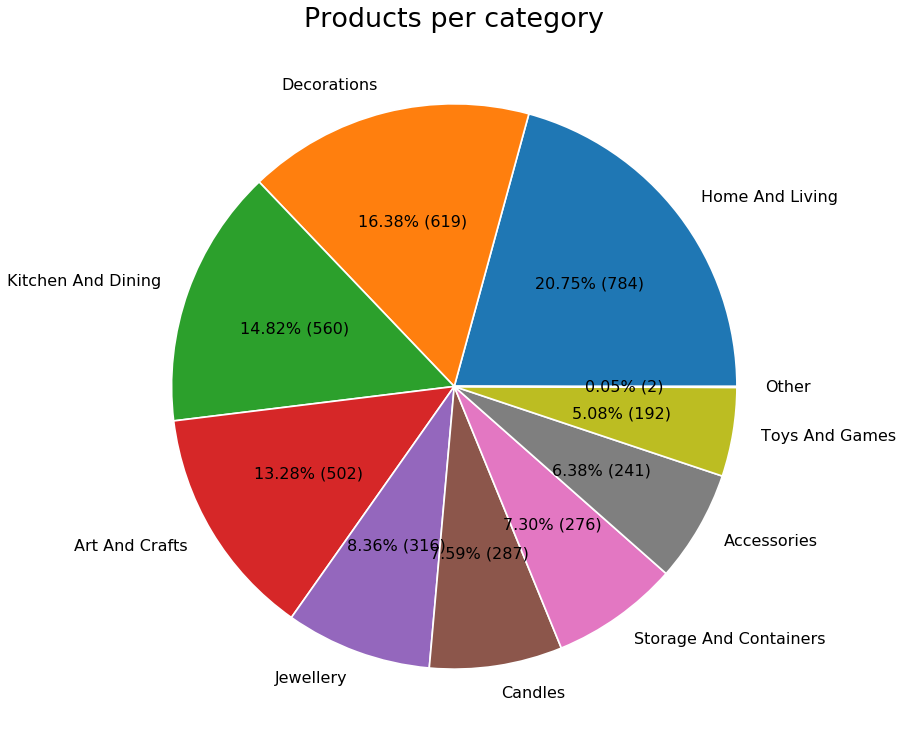

,category,products,products%
4,home_and_living,784,20.75
3,decorations,619,16.38
6,kitchen_and_dining,560,14.82
1,art_and_crafts,502,13.28
5,jewellery,316,8.36


In [69]:
#category size:
catproducts = total_cat_rev[['category', 'products']].sort_values('products', ascending = False)

plt.figure(figsize = (13, 13))
plt.pie(catproducts['products'], labels = catproducts['category'].str.title().str.replace('_', ' '),
        autopct = lambda x : '{:.2f}% ({:,.0f})'.format(x,x * sum(catproducts['products']) / 100),
        wedgeprops={"edgecolor" : "w", 'linewidth' : 1.7}, textprops={'color' : 'k', 'fontsize': 16, 'fontweight' : 'normal'})
plt.title('Products per category', size = 27)
plt.show()

catproducts['products%'] = (catproducts['products'] / catproducts['products'].sum() * 100).round(2)
display(catproducts.head())

#### Kitchen and dining is the category with most products
- It has 784 products which are 20.75% of the overall products in the shop.
- Behind are:
    - Home and living with 619 items (16.3%)
    - Decorations with 560 items (14.82%)

<a id="overallsold"></a>
[Back to category analysis table of contents](#catalysis) 

### Category overall units sold:

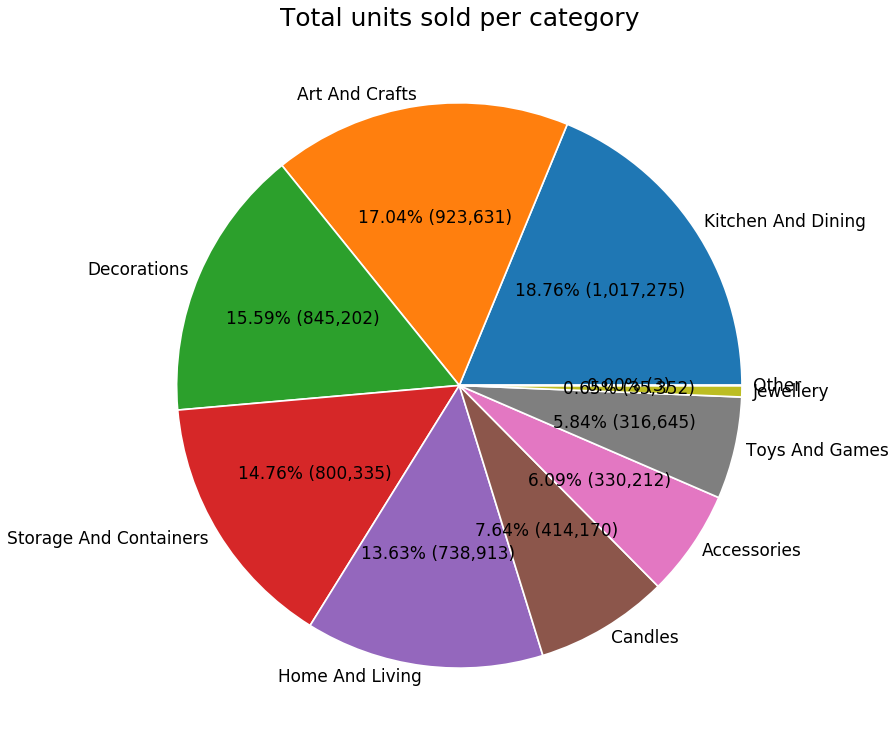

,category,total_sold,total_sold%
6,kitchen_and_dining,1017275,18.76
1,art_and_crafts,923631,17.04
3,decorations,845202,15.59
8,storage_and_containers,800335,14.76
4,home_and_living,738913,13.63


In [70]:
#catgory sale amount:
catsold = total_cat_rev[['category', 'total_sold']].sort_values('total_sold', ascending = False)

plt.figure(figsize = (13, 13))
plt.pie(catsold['total_sold'], labels = catsold['category'].str.title().str.replace('_', ' '),
        autopct = lambda x : '{:.2f}% ({:,.0f})'.format(x,x * sum(catsold['total_sold']/100)), labeldistance=1.04,
        textprops={'color' : 'k', 'fontsize': 17, 'fontweight':'normal'}, wedgeprops={"edgecolor" : "w", 'linewidth' : 1.7})
plt.title('Total units sold per category', fontsize = 25)
plt.show()

catsold['total_sold%'] = (catsold['total_sold'] / catsold['total_sold'].sum() * 100).round(2)
catsold.head()

#### Kitchen and dining has sold most units
- With amount of 1,017,275 items sold which is 18.76% of overall units sold.
- Behind are:
    - Art and crafts with 923,631 sold units - 17.04%.
    - Decorations with 845,202 sold units - 15.59%

<div class="alert alert-success"> <b>Team lead's comment:</b> + </div>

<a id="catotalrev"></a>
[Back to category analysis table of contents](#catalysis) 

### Category total revenue

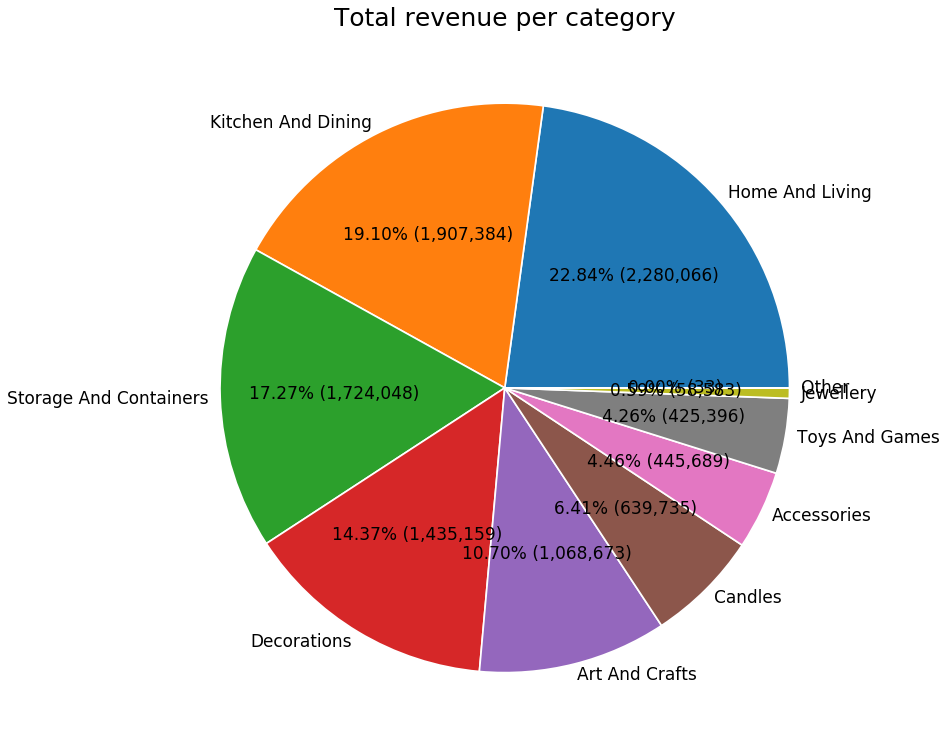

,category,total_revenue
4,home_and_living,2280066
6,kitchen_and_dining,1907384
8,storage_and_containers,1724048
3,decorations,1435159
1,art_and_crafts,1068673
2,candles,639735
0,accessories,445689
9,toys_and_games,425396
5,jewellery,58583
7,other,33


In [71]:
catsrev = total_cat_rev[['category', 'total_revenue']].sort_values('total_revenue', ascending = False)

plt.figure(figsize = (13, 13))
plt.pie(catsrev['total_revenue'], labels = catsrev['category'].str.title().str.replace('_', ' '),
        autopct = lambda x : '{:.2f}% ({:,.0f})'.format(x,x * sum(catsrev['total_revenue']/100)), labeldistance=1.04,
        textprops={'color' : 'k', 'fontsize': 17, 'fontweight':'normal'}, wedgeprops={"edgecolor" : "w", 'linewidth' : 1.7})
plt.title('Total revenue per category', fontsize = 25)
plt.tight_layout()
plt.show()
display(catsrev)

#### Home and living has the greatest revenue of 2,280,066
- This is 22.84% of the total revenue.
- Behind are:
    - Kitchen and dining with 1,907,384 revenue, (19.10%)
    - Storage and containers with 1,724,048 revenue (17.27%)
- It is important to remember that not all categories are of the same size, "storage and containers" for example is almost three time smaller than "home and living"

<a id="catavgrev"></a>
[Back to category analysis table of contents](#catalysis) 

### Category product average revenue

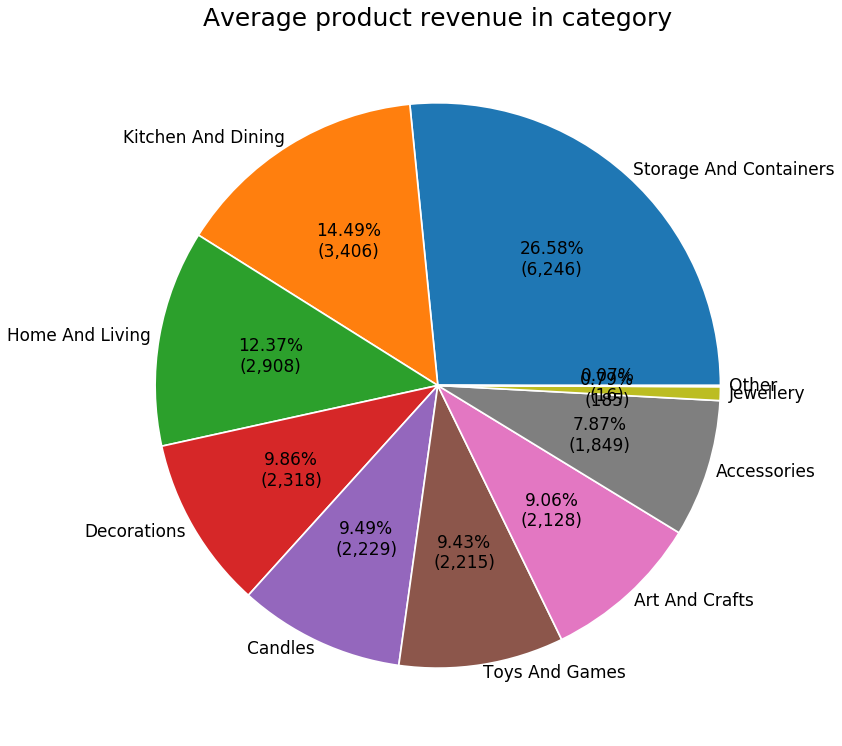

,category,arpcp,arpcp%
8,storage_and_containers,6246,26.58
6,kitchen_and_dining,3406,14.49
4,home_and_living,2908,12.37
3,decorations,2318,9.86
2,candles,2229,9.49


In [72]:
# pie showing ARPCP
#total_cat_rev['arpcp'] = total_cat_rev['total_revenue'] / total_cat_rev['products']

catavgpricepp = total_cat_rev[['category', 'arpcp']].sort_values('arpcp', ascending = False)

plt.figure(figsize = (13, 13))
plt.pie(catavgpricepp['arpcp'], labels = catavgpricepp['category'].str.title().str.replace('_', ' '),
        autopct = lambda x : '{:.2f}%\n({:,.0f})'.format(x,x * sum(catavgpricepp['arpcp'] / 100)), labeldistance=1.03,
        textprops={'color' : 'k', 'fontsize': 17, 'fontweight':'normal'}, wedgeprops={"edgecolor" : "w", 'linewidth' : 1.7})
plt.title('Average product revenue in category', fontsize = 25)
plt.show()

catavgpricepp['arpcp%'] = (catavgpricepp['arpcp'] / catavgpricepp['arpcp'].sum() * 100).round(2)
catavgpricepp.head()

#### Storage and containers category has the highest revenue of 6,246 per product.
- It is 26.61% of the total revenue per category.
- Behind are:
    - Kitchen and dining with 3406 (14.51%).
    - Home and living and dining with 2,908 (12.39%).

[Jump to products to expand](#aexpand)

<a id="arpcc"></a>
[Back to category analysis table of contents](#catalysis) 

### Average unit revenue per product in category

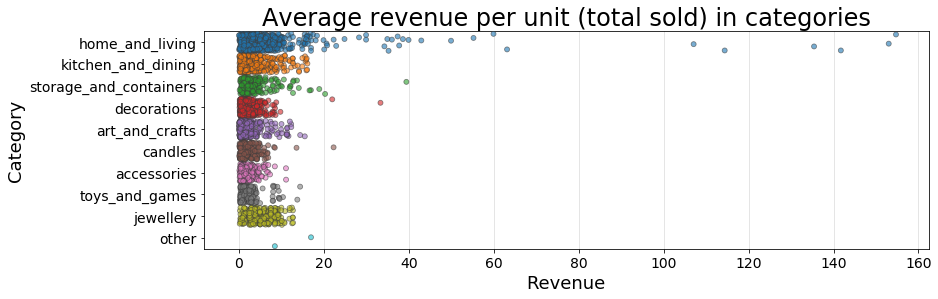

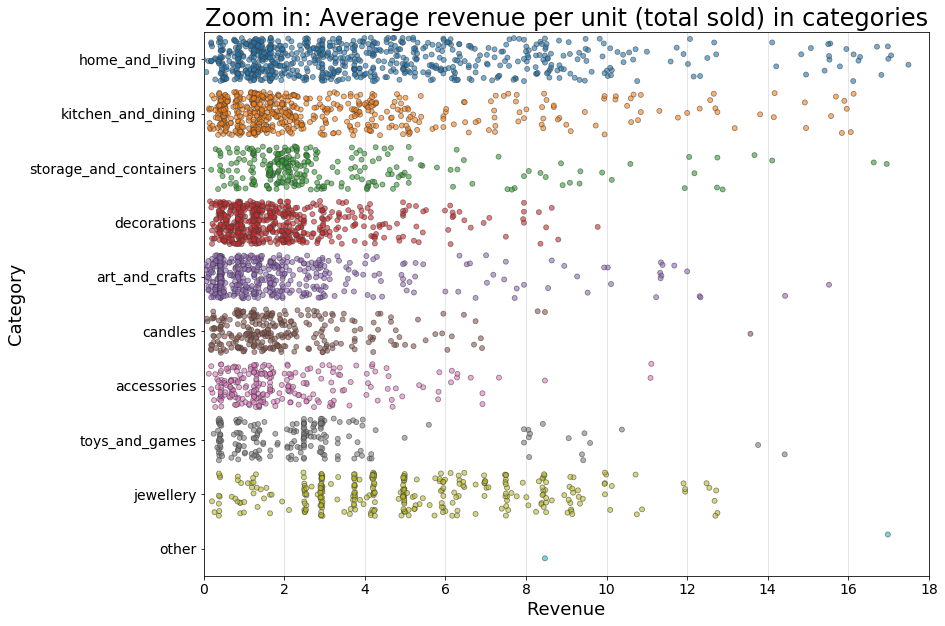

In [73]:
#arpu calculation for each product (total revenue / total sold units)
prodprice = item_revenue[['category', 'arpu', 'revenue']].sort_values(['category', 'revenue'], ascending = False)

plt.figure(figsize = (13, 4))
ax = sns.stripplot(y="category", x="arpu", data = prodprice, size = (5), alpha = 0.6, jitter = 0.4, 
                                                                   linewidth = 0.8, order = catsrev['category'])
plt.grid(axis = 'x', alpha = 0.4)
plt.title('Average revenue per unit (total sold) in categories', size = 24)
plt.xlabel('Revenue', size = 18)
plt.ylabel('Category', size = 18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.locator_params(axis="x", nbins=15)
plt.show()

#Zoom in:
plt.figure(figsize = (13, 10))
ax = sns.stripplot(y="category", x="arpu", data = prodprice, size = (5), alpha = 0.6, jitter = 0.4, 
                                                                   linewidth = 0.8, order = catsrev['category'])
plt.grid(axis = 'x', alpha = 0.4)
plt.title('Zoom in: Average revenue per unit (total sold) in categories', size = 24)
plt.xlabel('Revenue', size = 18)
plt.ylabel('Category', size = 18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.locator_params(axis="x", nbins=15)
plt.xlim(0, 18)
plt.show()

<div class="alert alert-success"> <b>Team lead's comment:</b> Love this graph! </div>

#### The range of average product unit revenue (or price) varies between the categories
- In both jewllery and in storage and containers categories we can see that there is less products with a low price.
- While in most other categories a good portion of the products are cheap.
- Home and living category has very high priced items in relation to the other categories, ranging from 20 to 160.

<a id="morethan30"></a>
[Back to category analysis table of contents](#catalysis) 

### Very expensive items
Products with an average price above 30

In [74]:
# showing expensive products
item_revenue[item_revenue['arpu'] > 30].sort_values('arpu', ascending = False)

,name,category,arpu,sold,revenue
2789,RUSTIC SEVENTEEN DRAWER SIDEBOARD,home_and_living,154.71,35,5415.00
2675,REGENCY MIRROR WITH SHUTTERS,home_and_living,153.00,10,1530.00
3469,VINTAGE BLUE KITCHEN CABINET,home_and_living,141.73,26,3685.00
3517,VINTAGE RED KITCHEN CABINET,home_and_living,135.42,60,8125.00
677,CHEST NATURAL WOOD 20 DRAWERS,home_and_living,114.38,24,2745.00
1852,LOVE SEAT ANTIQUE WHITE METAL,home_and_living,107.07,58,6210.00
2823,SCHOOL DESK AND CHAIR,home_and_living,63.14,19,1199.75
913,DECORATIVE HANGING SHELVING UNIT,home_and_living,59.95,6,359.70
3513,VINTAGE POST OFFICE CABINET,home_and_living,55.24,11,607.65
450,BLUE PAINTED KASHMIRI CHAIR,home_and_living,49.95,3,149.85


#### The very high priced products that are almost exclusive to the home and living category, are all furnitures

<a id="revperprodcat"></a>
[Back to category analysis table of contents](#catalysis) 

### Total revenue per product in category

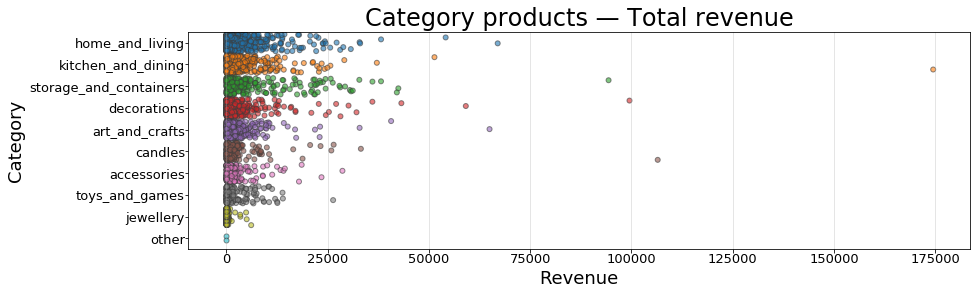

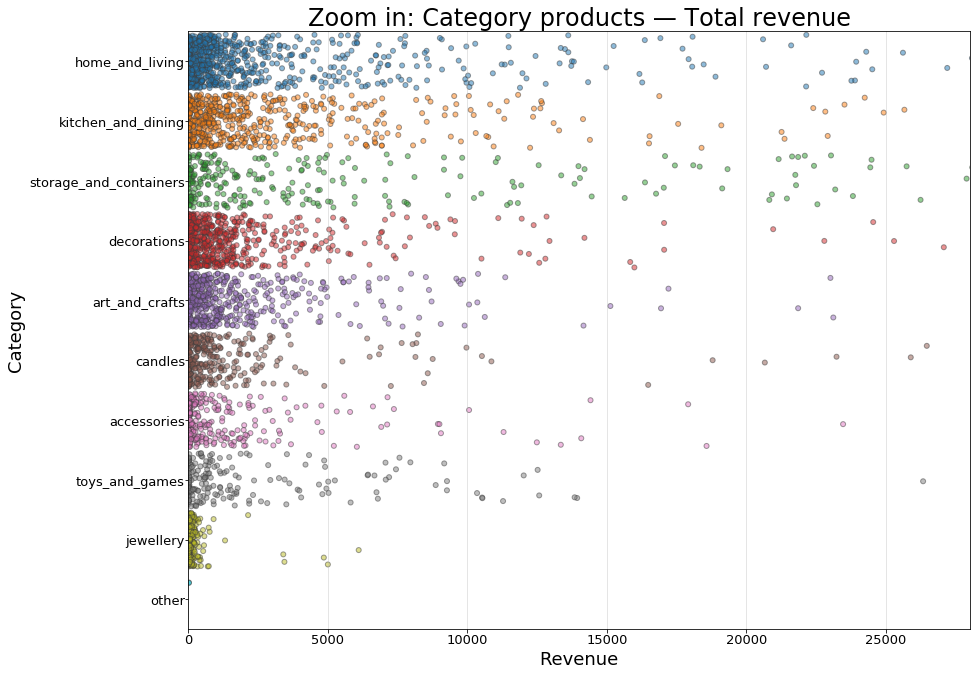

,category,total_sold,total_revenue,products,arpcp
4,home_and_living,738913,2280066,784,2908
6,kitchen_and_dining,1017275,1907384,560,3406
8,storage_and_containers,800335,1724048,276,6246
3,decorations,845202,1435159,619,2318
1,art_and_crafts,923631,1068673,502,2128
2,candles,414170,639735,287,2229
0,accessories,330212,445689,241,1849
9,toys_and_games,316645,425396,192,2215
5,jewellery,35352,58583,316,185
7,other,3,33,2,16


In [75]:
productrev = total_cat_rev.sort_values('total_revenue', ascending = False)
#stripplot of total revenue per product in category, sorted by category with highest revenue
plt.figure(figsize = (14, 4))
revenyestplot = sns.stripplot(y="category", x="revenue", data = item_revenue, size = 5, alpha = 0.6, jitter = 0.4, 
                                                          linewidth = 1, order = productrev['category'], zorder = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.title('Category products — Total revenue', size = 24)
plt.xlabel('Revenue', size = 18)
plt.ylabel('Category', size = 18)
plt.tick_params(axis='both', which='major', labelsize = 13, pad = 0)
plt.show()

#Zoom in:
plt.figure(figsize = (14, 11))
revenyestplotzoom = sns.stripplot(y="category", x="revenue", data = item_revenue, size = 5, alpha = 0.5, jitter = 0.45, 
                                                              linewidth = 1, order = productrev['category'], zorder = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.title('Zoom in: Category products — Total revenue', size = 24)
plt.xlabel('Revenue', size = 18)
plt.ylabel('Category', size = 18)
plt.tick_params(axis='both', which='major', labelsize = 13, pad = 0)
plt.xlim(0, 28000)
plt.show()

#display category information
display(productrev)

#### Mostly, the product revenue is correlated with category revenue
- One exception to this is storage and containers category, where its product revenue range is higher and more spread out.
    - The reason for this must be because there are fewer products overall in this category, and most these products also has a pretty high price, combined with pretty good sales, creating a nice revenue.

<a id="20krev"></a>
[Back to category analysis table of contents](#catalysis) 

#### What are the categories holding products with high revenue of above 20,000?

In [76]:
#items with most revenue above 20,000 are spread mostly in storage and containers and home and living.
display(item_revenue[item_revenue['revenue'] > 20000].sort_values('revenue', ascending = False)['category'].value_counts().head())

storage_and_containers    30
home_and_living           21
kitchen_and_dining        13
decorations               12
art_and_crafts             6
Name: category, dtype: int64

###### Storage and containers category holds the most products with very high revenue of 20,000
- Home and living is next with 21 items.
- Kitchen and dining and decorations with 13, and 12 items repectively.

<a id="catconc"></a>
[Back to category analysis table of contents](#catalysis) 

### Category analysis <br>Summary and conclusions

- The average price metric was calculated by using ARPU — Average Revenue Per Unit - the sum of revenue divided by the sum of:
    - Products in category (we called it ARPCP). Used to get an average revenue per porduct in the category.
    - Product units sold in total (ARPU). Used to get an average revenue of a single product unit.

- Top 3 categories with most products:
    - "kitchen and dining" has the largest product selection of 784,  and takes up 20.75% of all products in the shop.
    - "home and living" and "decorations" are right behind it with 619 (16.3%) and 560 (14.82%).
- Top 3 most selling categories:
    - "Kitchen and dining" has sold most units - 1,017,275 items sold which is 18.76% of overall units sold.
    - "art and crafts" and "decorations" are behind with 923,631 (17.04%) and 845,202 (15.59%).
- Top 3 categories with the most revenue:
    - "home and living" has the most revenue of 2,280,066, this is 22.84% of the shops revenue.
    - Behind are "kitchen and dining" with 1,907,384 (19.10%), and "storage and containers" with 1,724,048, (17.27%).
- Top 3 categories with the highest average revenue of product in category (ARPCP):
    - "storage and containers" has an average of 6,246 for each product.
    - Products in "kitchen and dining" and "home and living" has average revenue of 3406, and 2,908 each.
- The range of average product revenue (or price) in different categories varies.
    - In both "jewllery" and in "storage and containers" there are fewer cheap items, while in most other categories a good portion of the products are cheap.
    -"home and living" category has very high priced items in relation to the other categories, ranging from 20 to 160.
        - Most of these items are furniture.
- Product total revenue in "storage and containers" is higher than the other categories, <br>
    Although the category itself has less revenue than others because it holds less varaiety of products that other categories.

<div class="alert alert-success"> <b>Team lead's comment:</b> Categorization and analysis are on point! </div>

<a id="hypo"></a>
[Back to category analysis table of contents](#catalysis) 

[Back to table of contents](#toc)

---

## Hypotheses testing
- The following hyptheses will be tested:
    1. <font size="4">Low priced items have revnue that is equal to average priced items.
    2. High priced items have greater revenue than average priced items.</font>

[Hypotheses testing table of contents](#hypo)
- [Data distribution](#hypodist)
- [Price range split](#bananasplit)
- [Data distribution per price range](#hypodistprice)
- [Testing the hypotheses](#hypotest1)
    - [Low priced items have revnue that is equal to average priced items](#hypotest1)
    - [High priced items have greater revenue than average priced items](#hypotest2)
- [Hypotheses conclusions](#hypoconc)
   
   
[Back to table of contents](#toc) 
<a id="hypodist"></a>

---

### Data distribution

In [77]:
#!pip install seaborn --user --upgrade

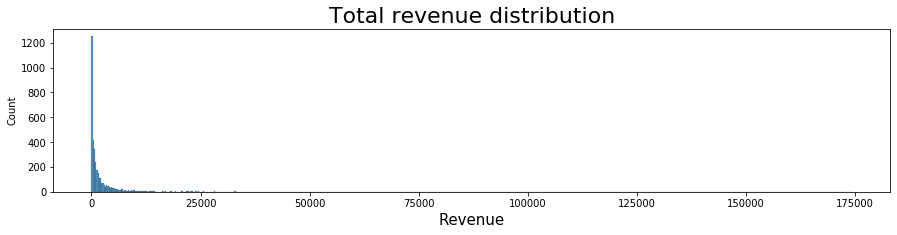

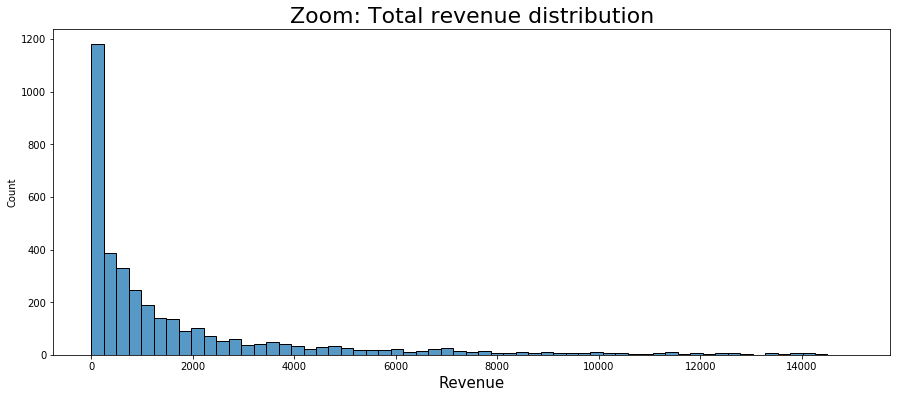

In [78]:
plt.figure(figsize = (15, 3))
sns.histplot(item_revenue['revenue'])
plt.title('Total revenue distribution', fontsize = 22)
plt.xlabel('Revenue', fontsize = 15)
plt.show()

plt.figure(figsize = (15, 6))
sns.histplot(item_revenue['revenue'], binrange = (0, 15000))
plt.title('Zoom: Total revenue distribution', fontsize = 22)
plt.xlabel('Revenue', fontsize = 15)
plt.show()

#### The data distribution positively skewed
- Or, The data distribution is non-normal.
- In our sample data, there are outliers as far on the 175,000 scale. This outlier represents other such values in the whole population.
- To test the hypotheses it is necessary to use a non parametric test.


The Mann Whitney U test will be used, this test is working well with outliers, and non-normal distributions.

[Back to hypothesis table of contents](#hypo) 
<a id="bananasplit"></a>

---

### The data will be split into 3 categories
- **Low priced** items: Average price of 0 - 1.
- **Average priced** items: Average price of 2 - 5.
- **Expensive priced** items: Average price of 8 and up (max is about 154)

Some items with price that is between these ranges and will not be included in the testing.

In [79]:
low_price = item_revenue[item_revenue['arpu'] <= 1]
mid_price = item_revenue[(item_revenue['arpu'] > 2) & (item_revenue['arpu'] <= 5)]
high_price = item_revenue[item_revenue['arpu'] >= 8]

[Back to hypothesis table of contents](#hypo) 
<a id="hypodistprice"></a>

---

### Data distribution per price range

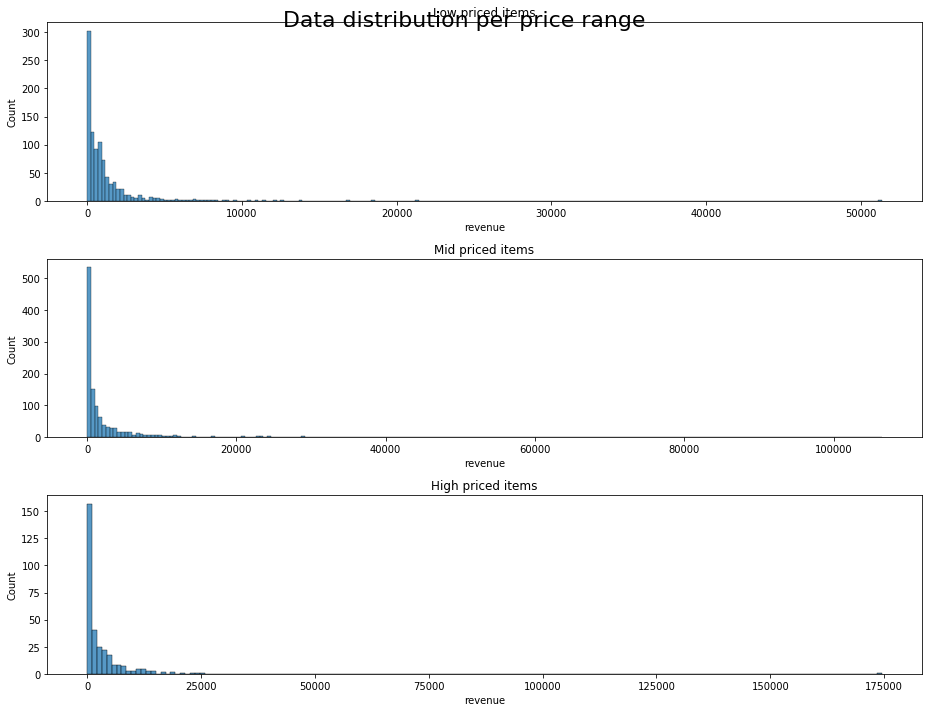

In [80]:
figure, axs = plt.subplots(nrows = 3, figsize = (13, 10))
cheap = sns.histplot(low_price['revenue'], ax = axs[0]).set(title ='Low priced items')
normal = sns.histplot(mid_price['revenue'], ax = axs[1]).set(title ='Mid priced items')
expensive = sns.histplot(high_price['revenue'], ax = axs[2]).set(title ='High priced items')
figure.suptitle("Data distribution per price range", fontsize = 22)
figure.tight_layout()
plt.show()

#### Not surprisingly, the data distribution remains the same.
- It is already seen that the price range positively affects the revenue.

[Back to hypothesis table of contents](#hypo) 
<a id="hypotest1"></a>

---

### Testing the hypotheses:
The hypotheses testing will be done using the Mann Whitney U test.

#### Hypothesis1 : <br>Low priced items have revnue that is equal to average priced items
- H₀: There is no significant statistical difference between the revenue of low priced items and the revenue of mid priced items.
- H₁: There is a significant statistical difference between the revenue of low priced items and the revenue of mid priced items.


We will use a z-test with significance level of 0.05:

In [81]:
alpha = 0.05

#results = st.ttest_ind(low_price['revenue'], mid_price['revenue'])
results = stats.mannwhitneyu(x = low_price['revenue'], y = mid_price['revenue'], alternative='two-sided')

print('alpha level:', alpha)
print('p-value: {:.10f}.'.format(results.pvalue)) #avoiding scientific notation
print()

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

alpha level: 0.05
p-value: 0.0000488564.

We reject the null hypothesis.


##### There is a statistically significant difference between the revenue of low priced and average priced items.
With a pvalue of 0.00004 it is safe to assume that one price range has better revenue than the other.

[Back to hypothesis table of contents](#hypo) 
<a id="hypotest2"></a>

---

#### Hypothesis2 : <br>High priced items have greater revenue than average priced items.
- H₀: There is no significant statistical difference between the revenue of mid priced items and the revenue of high priced items.
- H₁: There is a significant statistical difference between the revenue of mid priced items and the revenue of high priced items.


We will use a z-test with significance level of 0.05:

In [82]:
alpha = 0.05

#results = st.ttest_ind(low_price['revenue'], mid_price['revenue'])
results = stats.mannwhitneyu(x = mid_price['revenue'], y = high_price['revenue'], alternative='two-sided')

print('alpha level:', alpha)
print('p-value: {:.10f}.'.format(results.pvalue)) #avoiding scientific notation
print()

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

alpha level: 0.05
p-value: 0.0054729063.

We reject the null hypothesis


##### There is a statistically significant difference between the revenue of low priced and average priced items.
With a pvalue of 0.0054 it is safe to assume that one price range has better revenue than the other.

[Back to hypothesis table of contents](#hypo) 
<a id="hypoconc"></a>

---

### There is a statistically signifcant difference in revenue in products from different price range.
- In both hypotheses, The null hypothesis was rejected with a very low pvalue:
    - Low priced items have revnue that is equal to average priced items. -- pvalue of 0.00004
    - High priced items have greater revenue than average priced items. -- pvalue of 0.0054
    - In other words: <br>The total product revenue is different between the price ranges we have set of:
        - **Low priced** items: Average price of 0 - 1.
        - **Average priced** items: Average price of 2 - 5.
        - **High priced** items: Average price of 8 and up.

<a id="questions"></a>
[Back to hypothesis table of contents](#hypo) 

[Back to table of contents](#toc)

---

<div class="alert alert-success"> <b>Team lead's comment:</b> Hypotheses tests are done correctly! </div>

## Late EDA <br>Questions and answers

- [**What products sell together in the same purchase?**](#aprior)
    - [Answer: The same items sell together in different style or color](#aprioriconc)
    
    
- [**What price range actually has better revenue per product?**](#qprice)
    - [Anwer: Higher price range brings more revenue](#apricerange)
    
    
- [**What is the connection between revenue, quantity, and price?**](#qconnections)
    - [Answer: Revenue and Quantity are highly correlated.](#aconnections)
   
   
- [**What are the most popular items?**](#qpop)
    - [Answer: Popcorn holder, WW2 Gliders, Jumbo bag retrospot design](#apop)
    
    
- [**What products have the most revenue?**](#qrev)
    - [Answer: Regency Cakestand, T-light holder, Party bunting](#arev)
  
  
- [**Are there items that the average order depend on?**](#qdepends)
    - [Answer: Some products appear in more than 10% of invoices](#adepends)
    
    
- [**What kind of products should we expand the selection of?**](#qexpand)
    - [Answer: How to choose products to expand](#aexpand)
  
  
- [**Should certain items be excluded from the shop?**](#exclude)
    - [Answer: It is recommended to exclude all these items that sold a revenue of less than 50](#aexclude)


[Back to table of contents](#toc) 
<a id="aprior"></a>

---


### What products sell together in the same purchase?
- We will use association rules and Apriori algorithm to find out

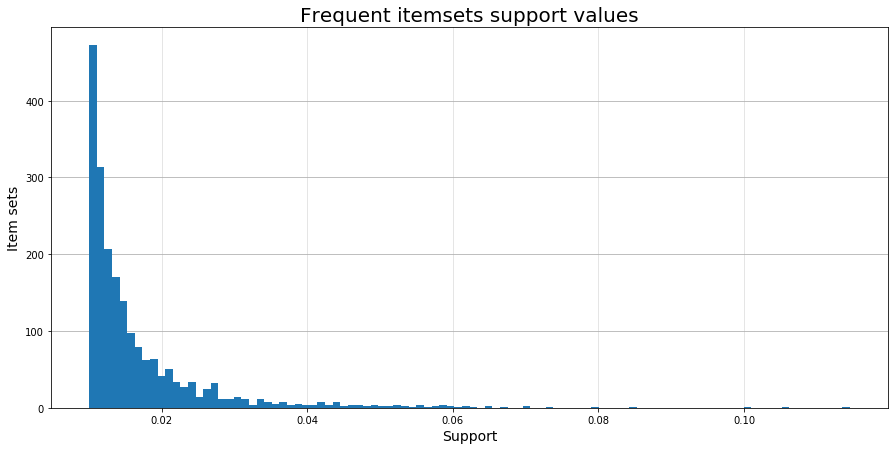

In [83]:
# Defining "basket" as by invoice and items as columns, summing their quantities per invoice
basket = (ecom[ecom['invoice'] != 0].groupby(['invoice', 'name'])['quantity'].sum().unstack().fillna(0).reset_index().set_index('invoice'))

# Rename any quantity that is not 0 to 1 saving into "basket_sets" (this takes a couple of seconds)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1   
basket_sets = basket.applymap(encode_units)


# Build up the frequent items    (this takes about 20- 30 seconds)
# A very low support is needed here because there are many different products in stock.
# Making it hard to fit item sets with support percentage.
# Lastly, low_memory is used since it's impossible to calculate a large dataset with such a small min_support.
frequent_itemsets = apriori(basket_sets, min_support = 0.01, use_colnames = True, low_memory = True )
frequent_itemsets.hist(figsize = (15, 7), bins = 100, zorder = 3)
plt.title('Frequent itemsets support values', fontsize = 20)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Item sets', fontsize=14)
plt.grid(axis = 'x', alpha = 0.4)
plt.show()

In [84]:
# Create the rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 40)
rules.sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010876,0.011988,0.010269,0.944186,78.757865,0.010138,17.701873
45,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011988,0.010876,0.010269,0.856540,78.757865,0.010138,6.894779
42,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.010774,0.012140,0.010269,0.953052,78.503658,0.010138,21.041413
47,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER PARSLEY)",0.012140,0.010774,0.010269,0.845833,78.503658,0.010138,6.416598
41,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER BASIL)",0.012140,0.010623,0.010117,0.833333,78.448413,0.009988,5.936264


In [85]:
#filtering rules:
rules[ (rules['lift'] >= 40) & (rules['confidence'] >= 0.0) ].sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010876,0.011988,0.010269,0.944186,78.757865,0.010138,17.701873
45,(HERB MARKER THYME),"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",0.011988,0.010876,0.010269,0.856540,78.757865,0.010138,6.894779
42,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.010774,0.012140,0.010269,0.953052,78.503658,0.010138,21.041413
47,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER PARSLEY)",0.012140,0.010774,0.010269,0.845833,78.503658,0.010138,6.416598
41,(HERB MARKER ROSEMARY),"(HERB MARKER THYME, HERB MARKER BASIL)",0.012140,0.010623,0.010117,0.833333,78.448413,0.009988,5.936264
36,"(HERB MARKER THYME, HERB MARKER BASIL)",(HERB MARKER ROSEMARY),0.010623,0.012140,0.010117,0.952381,78.448413,0.009988,20.745055
39,(HERB MARKER THYME),"(HERB MARKER BASIL, HERB MARKER ROSEMARY)",0.011988,0.010825,0.010117,0.843882,77.956544,0.009987,6.336067
38,"(HERB MARKER BASIL, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010825,0.011988,0.010117,0.934579,77.956544,0.009987,15.102462
22,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011988,0.012140,0.011179,0.932489,76.809933,0.011034,14.632673
23,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.012140,0.011988,0.011179,0.920833,76.809933,0.011034,12.480146


[Back to EDA](#questions) 
<a id="aprioriconc"></a>

#### A product of a certain style or color will often sell with the same product of a different style or color
- Some of the common item combinations in invoices:
    - A herb marker of certain herb, and other herb markers.
    - Regency tea plate of a sort, with regency tea plates of other sort.
    - Tree decorations, with different tree decorations.
    - Poppy's playhouse set parts, with other playhouse parts.
    - Jam jars with colorful lid, with jam jars with lids in different colors.
    - Polkadot cup of a color, and other color polkadot cups.
- Basically when a customer is purchasing an item that has different themes or uses, he is likely to buy the same item in different style.

[Back to EDA](#questions) 
<a id="qprice"></a>

### What price range actually has better revenue per product?
- Having tested the hypotheses has left us with this question open.
- The price range groups were and will be split as follows:
    - Low priced items:  price range of 0 to 1
    - Mid priced items:  price range of 2 to 5
    - High priced items: price range of 8 and above

#### Revenue distribution per price range

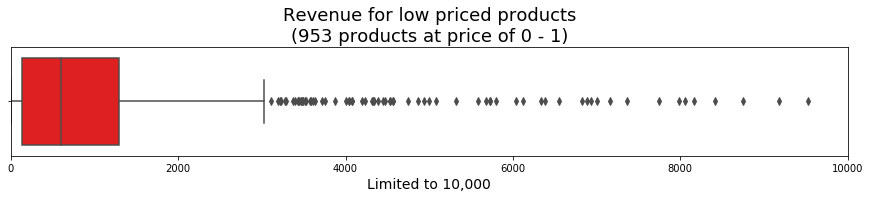

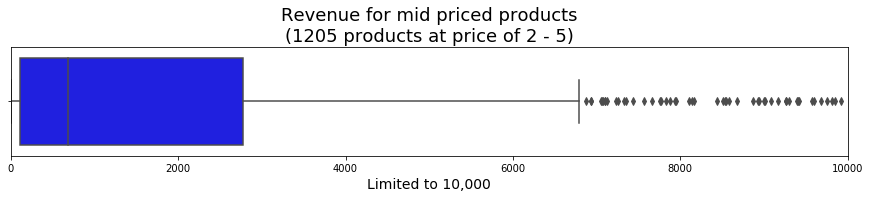

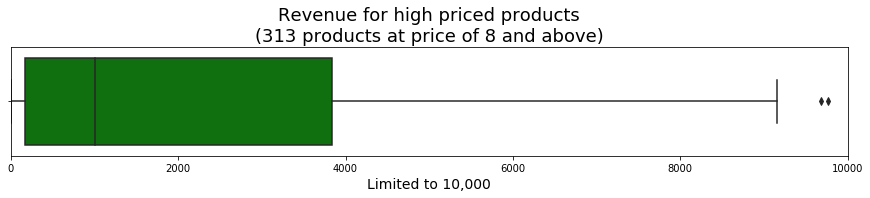

Revenue statistics per price range:

 953 Low priced products
   — mean:   599, median: 1,198, max: 51,354.

 1,205 Mid priced products
   — mean:   684, median: 3,004, max: 106,471.

 313 High priced products
   — mean: 1,007, median: 3,446, max: 174,484.


In [86]:
plt.figure(figsize = (15, 2))
sns.boxplot(data = low_price, color = 'r', x = 'revenue')
plt.xlim(0,10000)
plt.title('Revenue for low priced products\n({} products at price of 0 - 1)'.format(len(low_price)), fontsize = 18)
plt.xlabel('Limited to 10,000', fontsize = 14)#, loc = 'left') #works on newer versions of matplotlib than platforms
plt.show()
plt.figure(figsize = (15, 2))
sns.boxplot(data = mid_price, color = 'b', x = 'revenue')
plt.xlim(0,10000)
plt.title('Revenue for mid priced products\n({} products at price of 2 - 5)'.format(len(mid_price)), fontsize = 18)
plt.xlabel('Limited to 10,000', fontsize = 14)#, loc = 'left') #works on newer versions of matplotlib than platforms
plt.show()
plt.figure(figsize = (15, 2))
sns.boxplot(data = high_price, color = 'g', x = 'revenue')
plt.xlim(0,10000)
plt.title('Revenue for high priced products\n({} products at price of 8 and above)'.format(len(high_price)), fontsize = 18)
plt.xlabel('Limited to 10,000', fontsize = 14)#, loc = 'left') #works on newer versions of matplotlib than platforms
plt.show()


print('Revenue statistics per price range:')
print('\n {:,} Low priced products\n   — mean:   {:,.0f}, median: {:,.0f}, max: {:,}.'.format(
                len(low_price), low_price['revenue'].median(), low_price['revenue'].mean(), int(low_price['revenue'].max())))

print('\n {:,} Mid priced products\n   — mean:   {:,.0f}, median: {:,.0f}, max: {:,}.'.format(
            len(mid_price), mid_price['revenue'].median(), mid_price['revenue'].mean(), int(mid_price['revenue'].max())))
print('\n {:,} High priced products\n   — mean: {:,.0f}, median: {:,.0f}, max: {:,}.'.format(
            len(high_price), high_price['revenue'].median(), high_price['revenue'].mean(), int(high_price['revenue'].max())))

[Jump to products to expand](#aexpand)

<a id="apricerange"></a>

#### Products of high price range has the most revenue.
- Regardless of quantity sold, the higher the price range is the higher the revenue:
    - Low price products has the least revenue of up to 2000 for most products. 
        - The average revenue is 599, and the median is 1,189. the highest revenue is 51,354.
    - Mid price products has medium revenue of up to 3000 for most products.
        - The average revenue is 684, and the median is 3,004. the highest revenue is 106,471.
    - High price products has the most revenue of up to 4000 for most products.
        - The average revenue is 1,007, and the median is 3,446. the highest revenue is 174,484.


Important notes:
- It is important to remember that revenue is not profit, and it most likely that the cost of an item is higher for high priced items.
- The price of an item has to be justified in many many aspects. 
    <br>Just raising the price of a product just to increase revenue is a bad idea that can lead to the fall of a business.

[Back to EDA](#questions) 
<a id="qconnections"></a>

- [Jump to how to find profitable prodcuts](#qexpand)
- [Jump to what are successful products](#link_to_successful_prods_example)

---

### What is the connection between revenue, quantity, and price?

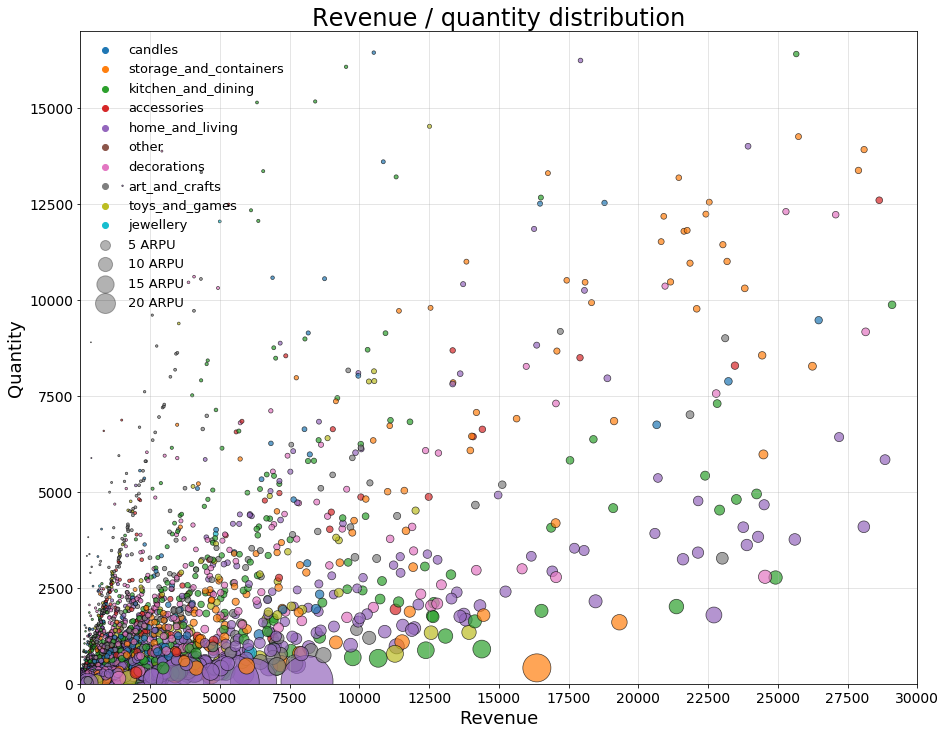

In [87]:
plt.figure(figsize = (15, 12))
sns.scatterplot(y="sold", x="revenue", data = item_revenue, hue = 'category', edgecolor = 'k', linewidth = .7,
                s = item_revenue['arpu'] * 20, alpha = 0.7)
plt.grid(alpha = 0.4)
plt.title('Revenue / quantity distribution', size = 24)
plt.xlabel('Revenue', size = 18)
plt.ylabel('Quantity', size = 18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(np.arange(0, item_revenue['revenue'].max(), 2500))
plt.yticks(np.arange(0, item_revenue['sold'].max(), 2500))
plt.xlim(0, 30000)
plt.ylim(0, 17000)
for size in range(5, 25, 5):
    plt.scatter([], [], c='k', alpha=0.3, s=size * 20,
                label=str(size) + ' ARPU')
plt.legend(scatterpoints = 1, frameon=False, fontsize = 13, loc = 'upper left')
plt.show()

[Back to EDA](#questions) 
<a id="aconnections"></a>

---

#### As expected, product revenue is highly correlated with quantity of units sold.
*This graph is limited to revenue of 30,000 and quantity of 20,000* <br>
Naturally, the more a product sells the more revenue it makes.
- ARPU (average revenue per unit):
    - The average price of most products with **VERY** high revenue is around 10 or lower. But there are only several such items. 
        - Having said that, There are still items with great revenue and average price of 10 and even 30 or more.
    - Products with high average price sell in smaller quantities AND for high revenue.
    - Quantity is very correlated to Average price, the higher the quantity, the smaller the price is.
    - Products of a very low average price has to sell at least 5000 pieces to make a good revenue.
    - Home and living has some products with a very high prices and small quantity sold, the items revenue is still good because their price is high, probably not too high for some customers.
       

[Back to EDA](#questions) 
<a id="qpop"></a>

---

### What are the most popular items? <br>Finding top 3 most sold products
And out of them who are the customers who purchased the most units

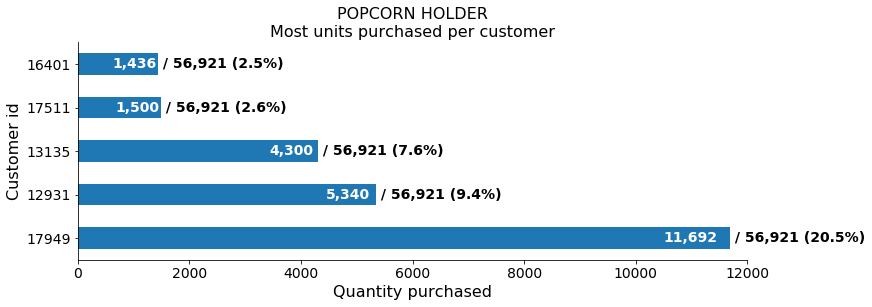

POPCORN HOLDER:
- This item has sold 56,921 units, for 51,354 revenue. Which is 0.90 a piece.
- Median quantity purchased per customer is 12
- Average quantity purchased per customer is 139.51

  The high average number is because these customers have purchased A LOT of units!
-----------------------------------------------------------------------------------------------------------


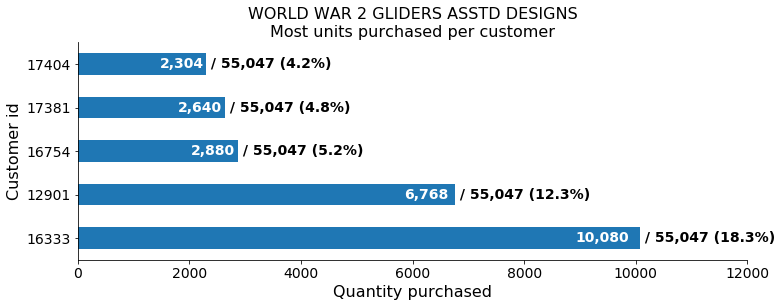

WORLD WAR 2 GLIDERS ASSTD DESIGNS:
- This item has sold 55,047 units, for 13,842 revenue. Which is 0.25 a piece.
- Median quantity purchased per customer is 48
- Average quantity purchased per customer is 178.72

  The high average number is because these customers have purchased A LOT of units!
-----------------------------------------------------------------------------------------------------------


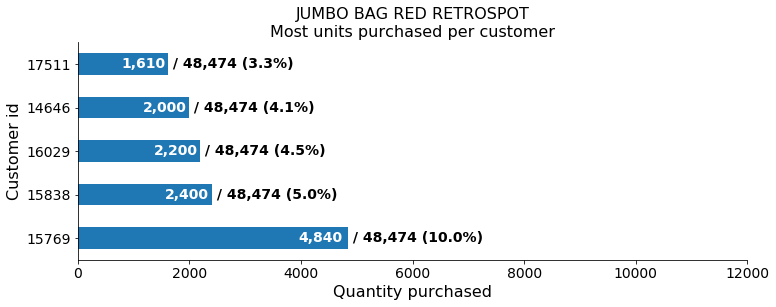

JUMBO BAG RED RETROSPOT:
- This item has sold 48,474 units, for 94,340 revenue. Which is 1.95 a piece.
- Median quantity purchased per customer is 10
- Average quantity purchased per customer is 76.22

  The high average number is because these customers have purchased A LOT of units!
-----------------------------------------------------------------------------------------------------------


In [88]:
#adding total_rev to ecom to calculate the following groupby from
ecom['total_rev'] = ecom['price'] * ecom['quantity']

#looping through top 3 products with highest quantity sold
#for item in item_revenue.sort_values('sold', ascending = False).head(3)['name']:
for item in ecom.groupby('name')['quantity'].sum().reset_index().sort_values('quantity', ascending = False).head(3)['name']:

    
    #creating table per product in loop by grouping on customer and aggregating quantities and revenue
    topquantities = ecom[ecom['name'] == item].groupby(['customer']).agg(
                 {'quantity':'sum', 'total_rev':'sum'}).sort_values('quantity', ascending = False).reset_index()
    
    #drawing graphs excluding customer id of 0 which is all unregistered customers
    ax = topquantities[topquantities['customer'] != 0].head(5).plot(
        figsize = (12, 4), kind = 'barh', y = 'quantity', x = 'customer', xlim = (0, 12000), legend = False)
    #raw quantity bar annotation:
    for bar in ax.patches:
        plt.text((bar.get_x()+ (bar.get_width()) / 1.02), bar.get_y() + (bar.get_height() / 2), '{:,}'.format(
                            int(bar.get_width())), ha='right', va='center', fontsize = 14, color = 'w', weight = 'bold')
    #percentage of quantity annotation:
    for bar in ax.patches:
        plt.text((bar.get_x()+ (bar.get_width())), bar.get_y() + (bar.get_height() / 2), ' / {:,} ({:.1%})'.format(
                                        topquantities['quantity'].sum(), bar.get_width() / topquantities['quantity'].sum()), 
                                                         ha='left', va='center', fontsize = 14, color = 'k', weight = 'bold')
        
    plt.title(item + '\nMost units purchased per customer', fontsize = 16)
    plt.tick_params(axis='both', which='major', labelsize = 14)
    plt.ylabel('Customer id', size=16)
    plt.xlabel('Quantity purchased', size=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

    print(item + ':\n- This item has sold {:,} units, for {:,.0f} revenue. Which is {:.2f} a piece.'.format(
                                                    topquantities['quantity'].sum(), topquantities['total_rev'].sum(),
                                                    topquantities['total_rev'].sum() / topquantities['quantity'].sum()))
    print('- Median quantity purchased per customer is {:.0f}'.format(topquantities['quantity'].median()))
    print('- Average quantity purchased per customer is {:.2f}'.format(topquantities['quantity'].mean()))
    print('\n  The high average number is because these customers have purchased A LOT of units!')
    print('-----------------------------------------------------------------------------------------------------------')

[Back to EDA](#questions) 
<a id="apop"></a>

---

#### Most sold products are:
1. Popcorn holder has sold **56,921 units**, for 51,354 revenue. Which is 0.90 a piece.
2. World war 2 gliders assorted designs has sold **55,047 units**, for 13,842 revenue. Which is 0.25 a piece.
3. Jumbo bag retrospot has sold **48,474 units**, for 13,842 revenue. Which is 0.25 a piece.

- These items average revenue per unit ranges between 0.25 to 1.95, so while these sell many units, their total revenue is smaller than that of oter items which sold in smaller quantity.
- Top customers who purchased these products purchased as much as 20% of the total units sold.<br>
- The average customer purchased from 10 to 50 units in total which is not even 1% of the total sold units.
<table><tr>
<td> <img ![popcorn] src="https://www.dollartree.com/ccstore/v1/images/?source=/file/v1789865527485707698/products/187684.jpg" alt="Drawing" style="height: 220px;"/> </td>
<td> <img ![gliders] src="https://images-na.ssl-images-amazon.com/images/I/51DND%2B6zHqL.jpg" alt="Drawing" style="height: 220px;"/> </td>
<td> <img src="https://m.media-amazon.com/images/I/91ccpvvtJ5L._AC_SL1500_.jpg.jpg" alt="Drawing" style="height: 220px;"/> </td>
</tr></table>

[Back to EDA](#questions) 
<a id="qrev"></a>

---

### What items had the most revenue?

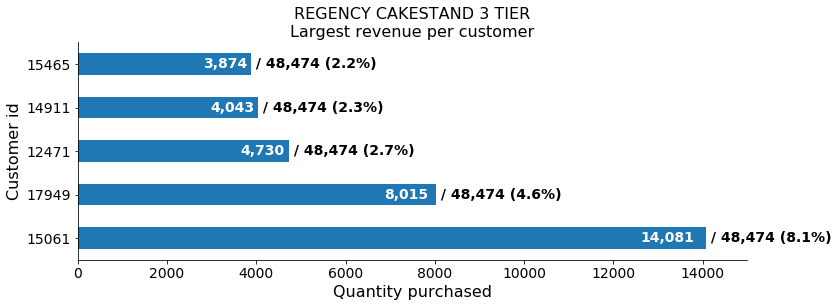

REGENCY CAKESTAND 3 TIER:
- This item has sold 13,879 units, for 174,485 revenue. Which is 12.57 a piece.
- Median revenue per customer is 38.25
- Average revenue per customer is 197.83

  The high average number is because these customers have purchased A LOT more than others for a lot of revenue!
-----------------------------------------------------------------------------------------------------------


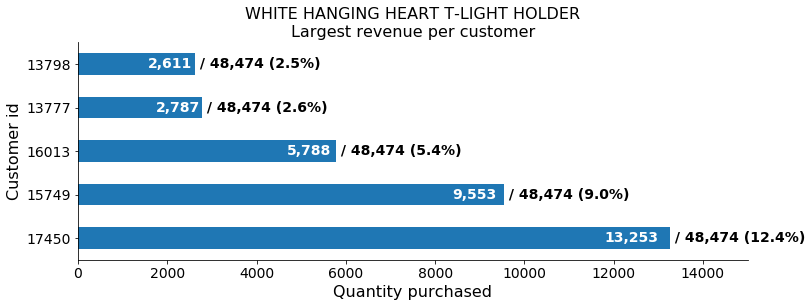

WHITE HANGING HEART T-LIGHT HOLDER:
- This item has sold 37,952 units, for 106,471 revenue. Which is 2.81 a piece.
- Median revenue per customer is 35.40
- Average revenue per customer is 124.24

  The high average number is because these customers have purchased A LOT more than others for a lot of revenue!
-----------------------------------------------------------------------------------------------------------


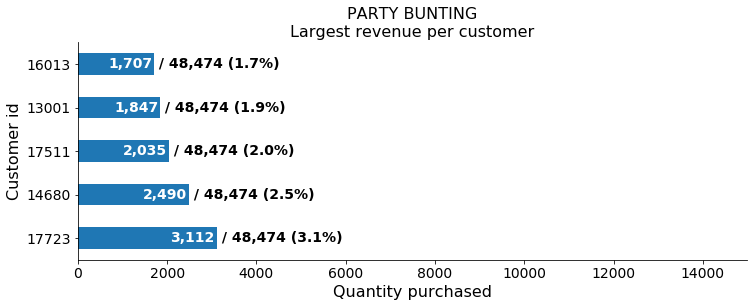

PARTY BUNTING:
- This item has sold 18,295 units, for 99,504 revenue. Which is 5.44 a piece.
- Median revenue per customer is 29.70
- Average revenue per customer is 140.34

  The high average number is because these customers have purchased A LOT more than others for a lot of revenue!
-----------------------------------------------------------------------------------------------------------


In [89]:
#adding total_rev to ecom to calculate the following groupby from
ecom['total_rev'] = ecom['price'] * ecom['quantity']

#looping through top 3 products with highest quantity sold
for item in ecom.groupby('name')['total_rev'].sum().reset_index().sort_values('total_rev', ascending = False).head(3)['name']:
    
    #creating table per product in loop by grouping on customer and aggregating quantities and revenue
    toprev = ecom[ecom['name'] == item].groupby(['customer']).agg(
                 {'quantity':'sum', 'total_rev':'sum'}).sort_values('total_rev', ascending = False).reset_index()
    
    #drawing graphs excluding customer id of 0 which is all unregistered customers
    ax = toprev[toprev['customer'] != 0].head(5).plot(figsize = (12, 4), kind = 'barh', y = 'total_rev', xlim = (0, 15000), x = 'customer', legend = False)
    for bar in ax.patches:
        plt.text((bar.get_x()+ (bar.get_width()) / 1.02), bar.get_y() + (bar.get_height() / 2), '{:,}'.format(
                            int(bar.get_width())), ha='right', va='center', fontsize = 14, color = 'w', weight = 'bold')
    for bar in ax.patches:
        plt.text((bar.get_x()+ (bar.get_width())), bar.get_y() + (bar.get_height() / 2), ' / {:,} ({:.1%})'.format(
                                        topquantities['quantity'].sum(), bar.get_width() / toprev['total_rev'].sum()), 
                                                 ha='left', va='center', fontsize = 14, color = 'k', weight = 'bold')

    plt.title(item + '\nLargest revenue per customer', fontsize = 16)
    plt.tick_params(axis='both', which='major', labelsize = 14)
    plt.ylabel('Customer id', size=16)
    plt.xlabel('Quantity purchased', size=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

    print(item + ':\n- This item has sold {:,} units, for {:,.0f} revenue. Which is {:.2f} a piece.'.format(toprev['quantity'].sum(), toprev['total_rev'].sum(), toprev['total_rev'].sum() / toprev['quantity'].sum()))
    print('- Median revenue per customer is {:.2f}'.format(toprev['total_rev'].median()))
    print('- Average revenue per customer is {:.2f}'.format(toprev['total_rev'].mean()))
    print('\n  The high average number is because these customers have purchased A LOT more than others for a lot of revenue!')
    print('-----------------------------------------------------------------------------------------------------------')

[Back to EDA](#questions) 
<a id="arev"></a>

---

#### Top 3 products with highest revenue are:
1. Regency Cakestand 3 tier has sold 13,879 units, for **174,485 revenue**. Which is 12.57 a piece.
2. White hanging heart t-light holder has sold 37,952 units, for **106,471 revenue**. Which is 2.81 a piece.
3. Party Bunting has sold 18,295 units, for **99,504 revenue**. Which is 5.44 a piece.

- These products are not among the expensive item range, their average revenue per unit is between 2.81 to 12.57.
- Although not the highest, these products still sold a very high amount of units.

The combination of medium ranged price and a healthy amount of sold units is key for having a great overall revenue.

<table><tr>
<td> <img ![popcorn] src="https://m.media-amazon.com/images/I/81tegvodrHL._AC_SL1500_.jpg" alt="Drawing" style="height: 220px;"/> </td>
<td> <img ![gliders] src="https://giftsatpinkparrot.com/wp-content/uploads/2013/02/AX182.jpg" alt="Drawing" style="height: 220px;"/> </td>
<td> <img src="https://thumbs.dreamstime.com/z/set-colorful-bunting-party-flags-vector-illustration-suitable-birthday-wedding-celebration-111735554.jpg" alt="Drawing" style="height: 220px;"/> </td>
</tr></table>

[Back to EDA](#questions) 
<a id="qdepends"></a>

---

### Are there items that the average order depend on?

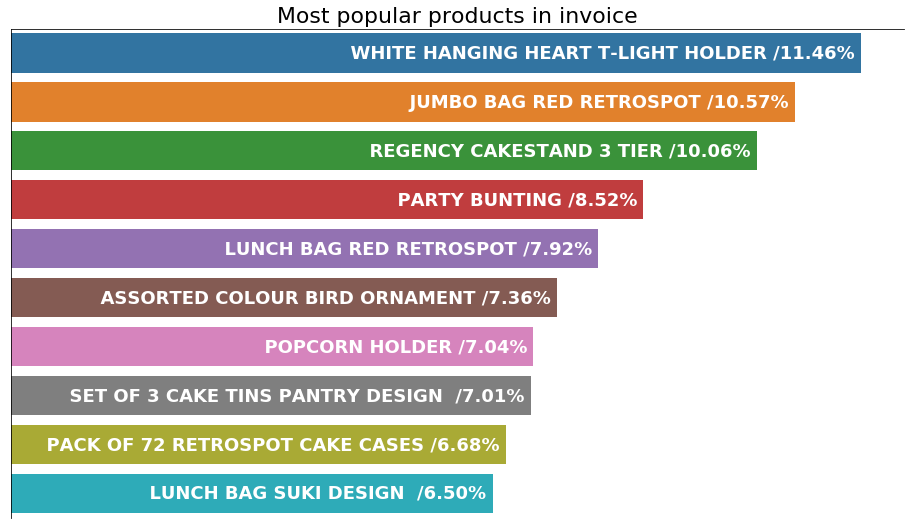

In [90]:
#find what items are in each invoice, and its quantity
invoice_items = ecom.groupby(['invoice', 'name'])['quantity'].sum().reset_index()

#divide the sum of times each name appeared in an invoice by the total number of invoices and showing first 10
product_appearance = ((invoice_items['name'].value_counts() / ecom['invoice'].nunique()).head(10).reset_index().rename(
                                                        columns = {'index':'product', 'name':'invoice_appearance%'}))

#barplot showing top 10 sold products and percentage of invoices they're in
plt.figure(figsize = (16, 9))
namepctplot = sns.barplot(data = product_appearance, y = 'product', x = 'invoice_appearance%')
plt.title('Most popular products in invoice', fontsize = 22)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
namepctplot.spines['right'].set_visible(False)
namepctplot.spines['bottom'].set_visible(False)
plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, labelbottom = False)

#adding text with name percentage to bars
for bar, name in zip(namepctplot.patches, '  ' + product_appearance['product']):
    namepctplot.text(bar.get_width() , bar.get_y() + bar.get_height()/2, name + ' /{:.2%} '.format(bar.get_width())
                                             , color = 'w', size = 18, ha = 'right', va = 'center', fontweight = 'bold') 
plt.show()

[Back to EDA](#questions) 
<a id="adepends"></a>

---

#### The following items showed in more than 10% of all invoices
- White hanging heart t-light holder - 11.46% of invoices
- Jumbo bag red retrospot - 10.57%
- Regency cakestand 3 tier - 10.06%

Respectively, these items are also among the top selling items in quantities.

[Back to EDA](#questions) 
<a id="qexpand"></a>

---

### What kind of products should we expand the selection of?
- To answer this we need to define what products are most successful and show high profit potential, and determine:
    - **[What defines a succesful product and how to find it?](#defsuccess)**
    - **[What products already sell with these characteristics?](#findsuccess)**


links:
- [What defines a good product and how to find it?](#defsuccess)
- [Finding products with very high revenue](#findrev)
- [What are common quantities and prices for products with great revenue?](#commonsuccess)
- [Creating a table with successful items (15% top revenue)](#findsuccess)


- [Conclusions - how to expand](#aexpand)

[Back to EDA](#questions) 


<a id="defsuccess"></a>

#### What defines a good product and how to find it?
A good product is a product that is profitable to sell, <br>
Considering that there is no data on the profit or cost products, to find these products, the following features are key:
- **Revenue** <br>
    This is the most important factor as it directly effects the profit.
- **Quantity** <br>
    Products that sell in large quantity not only affect revenue and profit, but also help to determine whether it is easy to sell the product and generate revenue from it.
- **Price** <br>
    We already found that [high price range has high revenue](#apricerange). But what is a common price for product of high revenue?. <br>
    it will be harder to generate revenue for low priced products unless they sell in thousands.

<a id="findrev"></a>
[Back to what products to expand](#qexpand)

#### Finding products with very high revenue
##### What is a great revenue?

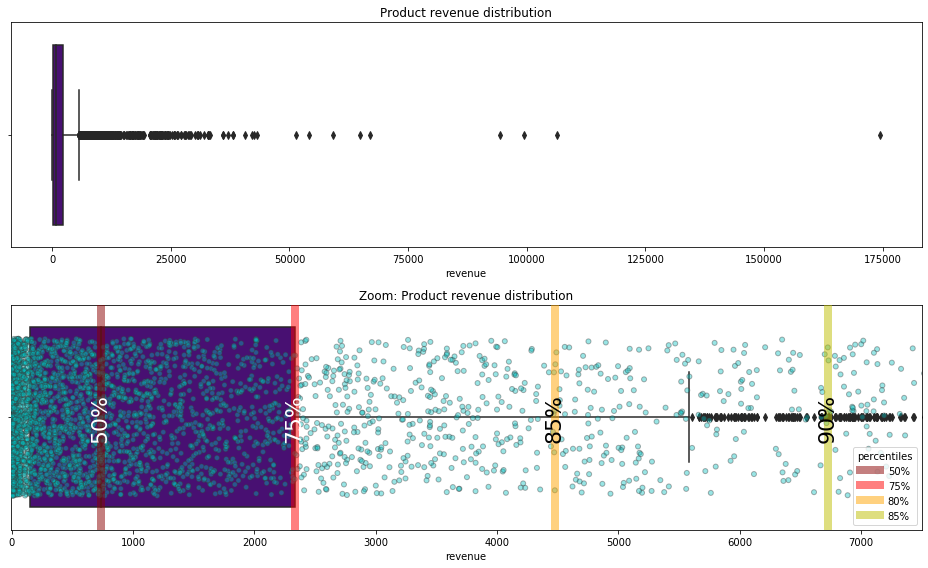

Percentile ranks for products revenue: 
50% is 730. 
75% is 2,331. 
85% is 4,477. 
90% is 6,727.

567 of the products that are within the 85th percentile (15% products with highest revenue).


In [91]:
#finding revenue distribution witha  boxplot, the zooming in to see what's going on and sticking a stripplot on top
figure, axs = plt.subplots(nrows = 2, figsize = (13, 8))
revenuebox = sns.boxplot(x = item_revenue['revenue'], ax = axs[0], color = 'indigo').set(title = "Product revenue distribution")
revenueboxzoom = sns.boxplot(x = item_revenue['revenue'], ax = axs[1], color = 'indigo').set(
                                                        title ="Zoom: Product revenue distribution", xlim = (-10, 7500))
revenueboxzoom = sns.stripplot(x = item_revenue['revenue'], ax = axs[1], color = 'c', linewidth = 1, jitter = 0.35, alpha = 0.4
                                                      ).set(xlim = (-10, 7500))


#adding percetile lines, paired with percetile text
plt.axvline((np.percentile(item_revenue['revenue'], [50])), color='darkred', linestyle='-', linewidth = 8, alpha = 0.5, zorder = 3, label = '50%')
plt.text((np.percentile(item_revenue['revenue'], [50])), 0, s = '50%', size = 22, rotation=90, ha = 'center', va = 'center', c = 'w')

plt.axvline((np.percentile(item_revenue['revenue'], [75])), color='r', linestyle='-', linewidth = 8, alpha = 0.5, zorder = 3, label = '75%')
plt.text((np.percentile(item_revenue['revenue'], [75])), 0, s = '75%', size = 22, rotation=90, ha = 'center', va = 'center', c = 'w')

plt.axvline((np.percentile(item_revenue['revenue'], [85])), color='orange', linestyle='-', linewidth = 8, alpha = 0.5, zorder = 3, label = '80%')
plt.text((np.percentile(item_revenue['revenue'], [85])), 0, s = '85%', size = 22, rotation=90, ha = 'center', va = 'center')

plt.axvline((np.percentile(item_revenue['revenue'], [90])), color='y', linestyle='-', linewidth = 8, alpha = 0.5, zorder = 3, label = '85%')
plt.text((np.percentile(item_revenue['revenue'], [90])), 0, s = '90%', size = 22, rotation=90, ha = 'center', va = 'center')

plt.legend(title = 'percentiles')
plt.tight_layout()
plt.show()

#printing information of percetiles in revenue
revpctiles = np.percentile(item_revenue['revenue'], [50, 75, 85, 90]).astype('int')
print('Percentile ranks for products revenue: \n50% is {:,}. \n75% is {:,}. \n85% is {:,}. \n90% is {:,}.'.format(revpctiles[0], revpctiles[1], revpctiles[2], revpctiles[3]))

#defining a slice the products with most revenue (15% with highest revenue) - based on percentiles above
good_rev = item_revenue[item_revenue['revenue'] >= 4477]

#how many products in the 85th percetile
print('\n{} of the products that are within the 85th percentile (15% products with highest revenue).'.format(len(good_rev)))

##### A good example of products with great revenue is any product with revenue higher than 4,477
- These are the 15% of items with the highest revenue
- Most product revenues are below 1,000.
- There are 567 products in the 85% revenue percentile (15% from the total of products)

<a id="commonsuccess"></a>
[Back to what products to expand](#qexpand)

#### What are common quantities and prices for products with great revenue?

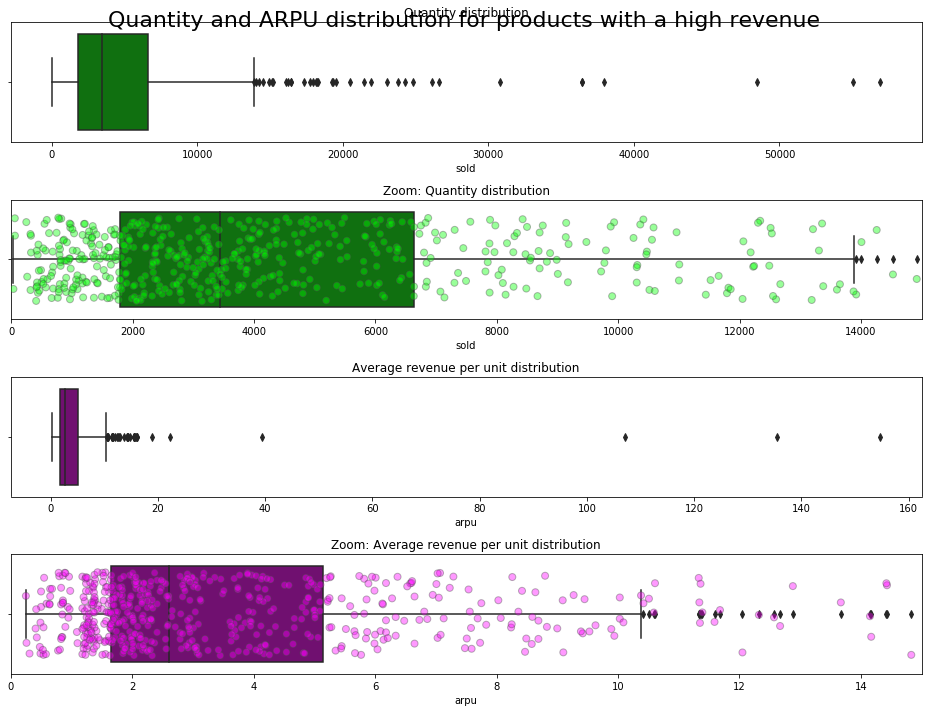

In [92]:
figure, axs = plt.subplots(nrows = 4, figsize = (13, 10))


soldbox = sns.boxplot(x = good_rev['sold'], ax = axs[0], color = 'g').set(
                                                        title ="Quantity distribution")
soldboxzoom = sns.boxplot(x = good_rev["sold"], ax = axs[1], color = 'g').set(
                                                        title ="Zoom: Quantity distribution", xlim = (-10, 15000))
sns.stripplot(x = good_rev['sold'], ax = axs[1], color = 'lime', linewidth = 1, size = 7, jitter = 0.35, alpha = 0.4).set(
                                                                                                        xlim = (-10, 15000))

arpubox = sns.boxplot(x = good_rev['arpu'], ax = axs[2], color = 'purple').set(title = "Average revenue per unit distribution")
arpuboxzoom = sns.boxplot(x = good_rev['arpu'], ax = axs[3], color = 'purple').set(
                                                        title ="Zoom: Average revenue per unit distribution", xlim = (0, 15))
sns.stripplot(x = good_rev['arpu'], ax = axs[3], color = 'fuchsia', linewidth = 1, size = 7, jitter = 0.35, alpha = 0.4).set(
                                                                                                                xlim = (0, 15))

figure.suptitle("Quantity and ARPU distribution for products with a high revenue", fontsize = 22)
figure.tight_layout()
plt.show()

##### For products with great revenue (of 4,477 and more):
- Common quantity is **1500 - 7000**.
- Common price is **1 - 6**.

<a id="link_to_successful_prods_example"></a>

#### A good example of successful products are product that has the following attributes:
- **Revenue higher than 4,477**
    - This is 15% of the products with the highest revenue.
    
- **Quantity of 1000 - 6000**
    - We want products that sell in good quantities, but not too good, because - as we concluded in: "*[The connection between revenue, quantity, and price](#qconnections)*", when the quantity is very high, the price is low. This means that the product has to sell in great quantities to become profitable. <br>Another subject that has to be taken into account is the cost of the product, but we do not have this data.
    
- **Price higher than 1**
    - While it's true that the higher price range has greater revenue. We see that the most common price for the products with the highest revenue is actually between 1 and 6. 
        <br>We should therefore keep an open mind about prices and not disregard a product just because it's not expensive enough. 
        <br>As a side note - it is not recommended to just blindly raise the price of items without a serious research.

<a id="findsuccess"></a>
[Back to what products to expand](#qexpand) 

#### Creating a table with products based on the conlusions above
Then displaying the 30 products with highest revenue sorted by category

In [93]:
success = good_rev.query('3000 >= sold > 1000 & arpu >= 1').sort_values('revenue', ascending = False)
success.head(30).sort_values(['category', 'revenue'], ascending = False)

,name,category,arpu,sold,revenue
524,BOX OF VINTAGE ALPHABET BLOCKS,toys_and_games,10.38,1342,13931.31
3675,WOODEN ROUNDERS GARDEN SET,toys_and_games,9.45,1331,12571.37
2292,PICNIC BASKET WICKER LARGE,storage_and_containers,12.05,1604,19322.16
2904,SET 7 BABUSHKA NESTING BOXES,storage_and_containers,8.07,1790,14453.47
2683,REGENCY TEAPOT ROSES,kitchen_and_dining,9.00,2770,24918.93
2628,RED RETROSPOT CAKE STAND,kitchen_and_dining,10.61,2013,21365.25
1633,IVORY KITCHEN SCALES,kitchen_and_dining,8.69,1901,16528.31
2609,RED KITCHEN SCALES,kitchen_and_dining,8.69,1627,14141.70
2903,SET 6 SCHOOL MILK BOTTLES IN CRATE,kitchen_and_dining,4.67,2845,13284.49
3306,SWEETHEART CAKESTAND 3 TIER,kitchen_and_dining,10.51,1245,13088.73


<div class="alert alert-success"> <b>Team lead's comment:</b> Bravo!</div>

[Jump to products to expand](#aexpand)


<a id="aexpand"></a>
[Back to what products to expand](#qexpand) 

#### It is therefore a good idea to expand the product range wile considering the following:

##### Category
- Make it a product that belongs in one of the leading categories: 
    <br>In every category there are winning products, but during the [category analysis we saw that the following categoies have great revenue per porduct](#catavgrev):
    - **Storage and containers**. - This is the best category because it's small in product selection but has the highest revenue per product (average of 6,246 - double or triple than any other category!).
    - **kitchen and dining** (average of 3,406).
    - **home and living** (average of 2,908).
- And maybe **avoid jewllery**, this category had very small revenue per product (average of only 185)

##### Price
- While any price range (maybe excluding 1 and below) has good petential produce large revenue. 
    <br> To find the best price range we need to focus on these facts:
    - **Price range of 8 and above:** During the EDA phase - [What price range actually has better revenue per product?](#qprice).
    <br>We found that items with high price range of 8 and above has the most revenue. 
    <br> And indeed in the [successful items list](#findsuccess), Most items with the highest revenue are priced above 8.
    <br>HOWEVER:
    - **Price range of 2 to 5:** These are the most common product prices in the same [list of successful items](#findsuccess) that contains already top 15% items with highest revenue.
    - **No Prices of below 1:** Lastly, Any price of 1 and below did not prove to generate high revenue, not in that list of ours, and not in the EDA checking price range (both mentioned above). Morover, we already suggested low priced items probably cost more in ratio of cost to to revenue, than other items.

##### Quantity
- The least important factor, but still may have an effect
    - A high quantity is important, it tells us that the product can sell easily.
    - But it also means the product might has low price, in wihch case the revenue may be low too.
    - We saw in the [what are the most popular items](#qpop) section that the 3 most popular products all had a price of less than 1. And while the revenue was still good. it was nothing compared to the [top 3 items with highest revenue](#qrev) that made much more revenue and sold much less in quantity.
    - Another good example is the [Relation between revenue, quantity and price](#qconnections) graph, where we can easily see how items that sold in large quantities most often had low revenue, and to gain good revenue had to sell in massive amounts. 
- Based on this, the quantity has the least weight of how profitable a product can be, but to be on the safe side it is best to **try and find products that will potentially sell in at least a low quantity of 1000**.

    
    
#### Summary:
Try to expand the product range in this direction:
- Match these categories:
    - **Storage and containers**
    - **kitchen and dining**
    - **home and living**
- Price of 7-12, but as long as it's not below 1, and the price is just. it is still ok.
- Estimate that it will sell at least a 1000 units a year.

[Back to what products to expand](#qexpand) 

[Back to EDA](#questions) 
<a id="exclude"></a>

---

### What items should be excluded from the shop?

links:
- [Finding products that did not sell many units](#soldlittle)
- [How many products with 9 or less units sold are there?<br>
    And what products only sold one unit?](#soldonce)
- [What items have the smallest overall revenue?](#leastrev)
- [What are common quantities and prices for products with great revenue?](#leastrev)
- [Conclusion: <br>It is recommended to exclude all these items that sold a revenue of less than 50](#aexclude)

[Back to EDA](#questions) 


<a id="soldlittle"></a>

#### Finding products that did not sell many units
Let us find products that sold 9 or less units

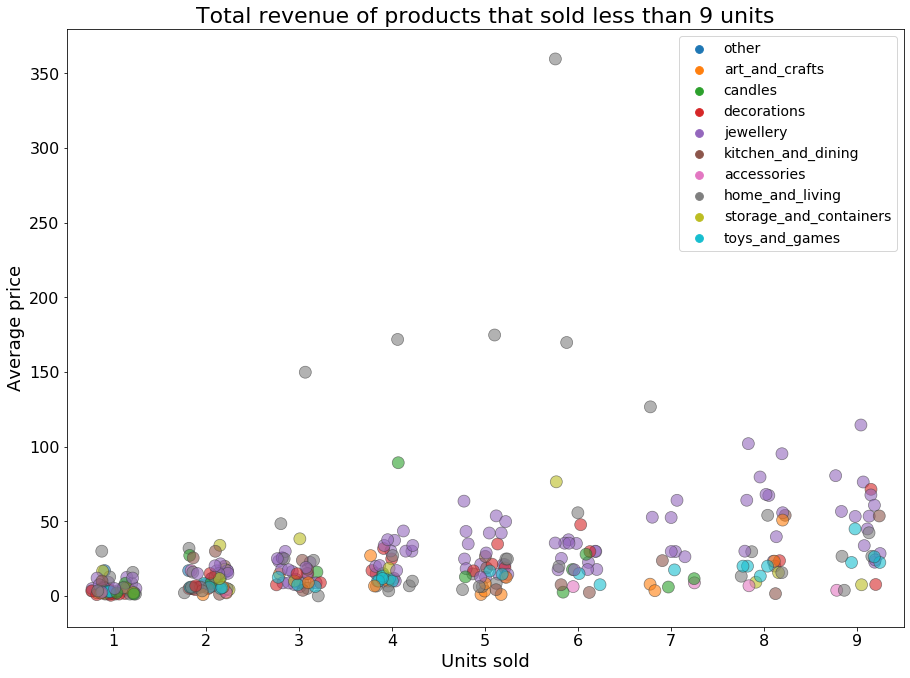

Out of 331 Products sold 9 or less units.
Here are the 10 with least revenue:


,name,category,arpu,sold,revenue
2181,PADS TO MATCH ALL CUSHIONS,home_and_living,0.00,3,0.003
1566,HEN HOUSE W CHICK IN NEST,decorations,0.42,1,0.420
3470,VINTAGE BLUE TINSEL REEL,art_and_crafts,0.42,2,0.840
2344,PINK CRYSTAL GUITAR PHONE CHARM,decorations,0.85,1,0.850
1527,HAPPY BIRTHDAY CARD TEDDY/CAKE,art_and_crafts,0.19,5,0.950
627,CAT WITH SUNGLASSES BLANK CARD,art_and_crafts,0.19,5,0.950
106,60 GOLD AND SILVER FAIRY CAKE CASES,kitchen_and_dining,0.55,2,1.100
1109,ETCHED GLASS STAR TREE DECORATION,decorations,1.25,1,1.250
385,BLACKCHRISTMAS TREE 30CM,home_and_living,1.25,1,1.250
1013,DUSTY PINK CHRISTMAS TREE 30CM,home_and_living,1.25,1,1.250


In [94]:
sold_least = item_revenue[item_revenue['sold'] <= 9]
plt.figure(figsize = (15, 11))
sns.stripplot(data = sold_least, x = 'sold', y = 'revenue', hue = 'category', jitter =0.25, size= 12, linewidth =.7, alpha =0.6)
plt.title('Total revenue of products that sold less than 9 units', fontsize = 22)
plt.xlabel('Units sold', fontsize = 18)
plt.ylabel('Average price', fontsize = 18)
plt.tick_params(axis = 'both', labelsize = 16)
plt.legend(fontsize = 14)
plt.show()

print('Out of {} Products sold 9 or less units.\nHere are the 10 with least revenue:'.format(len(sold_least)))
display(sold_least.sort_values('revenue').head(10))

##### There are 331 products with less than 9 units sold each.
- These products are of mixed categories
- These product prices range from 0.003 to 60. While for most products the price is smaller than 10.

<a id="soldonce"></a>
[Back to what products to exclude](#exclude) 

#### How many products with 9 or less units sold are there? <br>And what products only sold one unit?

In [95]:
print('{} items were sold less than 9 units.'.format(len(item_revenue[(item_revenue['sold'] <= 9)])))
print('\n\nThe following {} items were only sold once:\n(Arranged from lowest price to highest)'.format(
                                                                                len(item_revenue[item_revenue['sold'] == 1])))
display(list(zip(item_revenue[item_revenue['sold'] == 1].sort_values('revenue')['arpu'].tolist(),
                 item_revenue[item_revenue['sold'] == 1].sort_values('revenue')['name'].tolist())))

331 items were sold less than 9 units.


The following 59 items were only sold once:
(Arranged from lowest price to highest)


[(0.42, 'HEN HOUSE W CHICK IN NEST'),
 (0.85, 'PINK CRYSTAL GUITAR PHONE CHARM'),
 (1.25, 'ORANGE FELT VASE + FLOWERS'),
 (1.25, 'PACK 4 FLOWER/BUTTERFLY PATCHES'),
 (1.25, 'FUNKY MONKEY MUG'),
 (1.25, 'ETCHED GLASS STAR TREE DECORATION'),
 (1.25, 'DUSTY PINK CHRISTMAS TREE 30CM'),
 (1.25, 'WIRE FLOWER T-LIGHT HOLDER'),
 (1.25, 'BLACKCHRISTMAS TREE 30CM'),
 (1.65, 'CROCHET LILAC/RED BEAR KEYRING'),
 (1.65, 'FLOWER SHOP DESIGN MUG'),
 (1.66, 'BLUE CRYSTAL BOOT PHONE CHARM'),
 (1.95, 'EASTER CRAFT IVY WREATH WITH CHICK'),
 (1.95, 'PINK POLKADOT KIDS BAG'),
 (1.95, 'SET OF THREE VINTAGE GIFT WRAPS'),
 (2.1, 'GOLD COSMETICS BAG WITH BUTTERFLY'),
 (2.1, 'TEA TIME BREAKFAST BASKET'),
 (2.1, 'SCALLOP SHELL SOAP DISH'),
 (2.1, 'SET/6 IVORY BIRD T-LIGHT CANDLES'),
 (2.12, 'DOLPHIN WINDMILL'),
 (2.48, 'TINY CRYSTAL BRACELET RED'),
 (2.51, 'PINK FEATHER CHRISTMAS DECORATION'),
 (2.55, 'NECKLACE+BRACELET SET PINK DAISY'),
 (2.91, 'SET 10 CARDS 3 WISE MEN 17107'),
 (2.91, 'SET 10 CARDS SNOWY ROBIN 

#### 331 Products sold less than 9 units
- 59 products from this list were sold once only.
    - The price range for these is from 0.42 to 29.95, while most product prices are between 1 and 3.

<a id="leastrev"></a>
[Back to what products to exclude](#exclude) 

#### What items have the smallest overall revenue?

In [96]:
print('There are {} items with revenue smaller than 50.\n\nThe 10 products with least revenue are:'.format(
                                                                        len(item_revenue[item_revenue['revenue'] < 50])))
display(item_revenue.sort_values(['revenue']).head(10))

There are 545 items with revenue smaller than 50.

The 10 products with least revenue are:


,name,category,arpu,sold,revenue
2181,PADS TO MATCH ALL CUSHIONS,home_and_living,0.00,3,0.003
1566,HEN HOUSE W CHICK IN NEST,decorations,0.42,1,0.420
3470,VINTAGE BLUE TINSEL REEL,art_and_crafts,0.42,2,0.840
2344,PINK CRYSTAL GUITAR PHONE CHARM,decorations,0.85,1,0.850
627,CAT WITH SUNGLASSES BLANK CARD,art_and_crafts,0.19,5,0.950
1527,HAPPY BIRTHDAY CARD TEDDY/CAKE,art_and_crafts,0.19,5,0.950
106,60 GOLD AND SILVER FAIRY CAKE CASES,kitchen_and_dining,0.55,2,1.100
1301,FUNKY MONKEY MUG,kitchen_and_dining,1.25,1,1.250
3653,WIRE FLOWER T-LIGHT HOLDER,candles,1.25,1,1.250
2105,ORANGE FELT VASE + FLOWERS,home_and_living,1.25,1,1.250


##### As many as 545 products had a total revenue of less than 50.
- First place in hall of shame is "Cushion pads" with total of 3 sold units for 0.001 each.
- Naturally, the total revenue correlates to the quantity sold.

<a id="aexclude"></a>
[Back to what products to exclude](#exclude) 

#### It is recommended to exclude all these items that sold a revenue of less than 50
- Below is a variable of all these items. The list is saved as items_to_remove, Only 10 random items are printed.

In [97]:
items_to_remove = item_revenue[(item_revenue['sold'] < 50) & (item_revenue['revenue'] < 75)].sort_values('revenue')
print('There are {} items which sold less than 50 units and 75 revenue in the past year.\nA sample of 10 items:'.format(
                                                                                                        len(items_to_remove)))
items_to_remove.sample(10)['name'].tolist()

There are 605 items which sold less than 50 units and 75 revenue in the past year.
A sample of 10 items:


['CRACKED GLAZE EARRINGS BROWN',
 'OLD DOC RUSSEL METAL SIGN',
 'MOP PENDANT SHELL NECKLACE',
 'SET 10 CARDS 12 DAYS OF XMAS 17059',
 'SET OF 3 CONEY ISLAND OVAL BOXES',
 'VINTAGE GLASS TEA CADDY',
 'YULETIDE IMAGES S/6 PAPER BOXES',
 'BAROQUE BUTTERFLY EARRINGS BLACK',
 'PURPLE VINTAGE EARRINGS',
 'HAND PAINTED HANGING EASTER EGG']

[Back to what products to expand](#exclude) 

[Back to EDA](#questions) 

[Back to table of contents](#toc) 

<a id="generalelectric"></a>

---

## General conclusions and recommendations

After cleaning and processing the data, there are 3,779 products spread in 9 categories, and 4,333 unique customer ids, whom together with the unregistered customers, purchased in 19,769 invoices, for total revenue of 9,984,772 in roughly one year (Nov-29 2018 to Dec-07 2019).

The analysis took focus on products that were sold during the year, as a full annual analysis, and not broken into seasons or any timestamps. 


### Categories:
- The 3 categories with highest revenue are:
    - **"Home and living"** (2,280,066).
    - **"Kitchen and dining"** (1,907,384).
    - **"Storage and containers"** (1,724,048).
    
- The first two; "home and living" and "kitchen and dining" are also the largest categories with most products.
- "storage and containers"  has the most revenue per product (6,246), almost double than the "kitchen and dining" category which has the second highest average revenue per product (3,406).

- "Arts and crafts" and "decorations" sold the highest amount of units, but their revenue was not as great as the previous categories (total of 1,435,159 and 1,068,673).
- The "jewlerry" category is not successful to say the least. 
    <br>yes, it is very small in it's product selection, but it is also very small in its average revenue per product - only 185 average revenue per product.
    <br>For comparison - "accessories" is the second worse in average revenue per product of 1,834, and "storage and containers" is the highest in average revenue per product of 6,246!.


### Hypotheses testing
- We tested if there is a statistically significant difference in revenue between:
    - Low priced items (0-1) - and - mid priced items (2-5). 
    - Mid priced items (2-5) - and - high priced items (8 and above).
- The "Mann Whitney U" test was selected as the revenue distribution was negatively skewed and had outliers.
- **The test proved that there is a statistically signifcant difference in revenue of products belonging to the different price ranges.**
    <br> In both hypotheses, The null hypothesis that claim the revenue is equal between the price range groups was rejected with a very low pvalue:
    - Testing **low priced** and **average priced** items revenue with alpha level of 0.05 produced a pvalue of 0.00004.
    - Testing **mid priced** and **high priced** items revenue with alpha level of 0.05 produced a pvalue of 0.0054.

### Price and revenue

#### What is the price range that makes the most revenue
Following the hypotheses testing. It was found that regardless of quantity sold, the higher the price range is, the higher the revenue:
- Low price products (0-1), has the least revenue of up to 2000 for most products. 
    - The average revenue is 599, and the median is 1,189. the highest revenue is 51,354.
- Mid price products (2-5), has medium revenue of up to 3000 for most products.
    - The average revenue is 684, and the median is 3,004. the highest revenue is 106,471.
- High price products (8 and above), has the most revenue of up to 4000 for most products.
    - The average revenue is 1,007, and the median is 3,446. the highest revenue is 174,484.
    
#### More on price and revenue
- Products with **VERY** high revenue has an average price of about 10 or lower. But there are only several such items.
- There are also products with great revenue and average price of 10 and even 30 or more.
- Products with high price sell in smaller quantities AND for high revenue.
- Products of a very low price has to sell at least 5000 pieces to make a good revenue.
- Home and living has some products with a very high prices and small quantity sold, these are mostly furnitures, they make good revenue because their price is high, and probably justified, or not too high to deter customers.
- Products with high average price sell in smaller quantities AND for higher revenue  than products with a low price range.

- It is important to remember that revenue is not profit, as there is no cost data available to calculate profit with, revenue is the next best metric.
- The combination of medium ranged price and a healthy amount of sold units is key for having a great overall revenue.

#### Top 3 products with highest revenue are:
1. Regency Cakestand 3 tier has sold 13,879 units, for **174,485 revenue**. Which is 12.57 a piece.
2. White hanging heart t-light holder has sold 37,952 units, for **106,471 revenue**. Which is 2.81 a piece.
3. Party Bunting has sold 18,295 units, for **99,504 revenue**. Which is 5.44 a piece.
- These products are not among the high priced items range, their average revenue per unit is between 2.81 to 12.57.
    - These products also sold a very high amount of units.

### Products purchased in the same cart: <br>A product of a certain style will often sell with the same product of a different style
By using association rules and Apriori algorithm, It was concluded that:
- Some of the common item combinations in invoices:
    - A herb marker of certain herb, and other herb markers.
    - Regency tea plate of a sort, with regency tea plates of other sort.
    - Tree decorations, with different tree decorations.
    - Poppy's playhouse set parts, with other playhouse parts.
    - Jam jars with colorful lid, with jam jars with lids in different colors.
    - Polkadot cup of a color, and other color polkadot cups.
- **Basically when a customer is purchasing an item that has certain style and theme, it is likely to to be purchased with another item of the same type but in different style.**

### Quantity and frequency
#### Most selling products are:
1. Popcorn holder has sold **56,921 units**, for 51,354 revenue. Which is 0.90 a piece.
2. World war 2 gliders assorted designs has sold **55,047 units**, for 13,842 revenue. Which is 0.25 a piece.
3. Jumbo bag retrospot has sold **48,474 units**, for 13,842 revenue. Which is 0.25 a piece.

- These items average revenue per unit ranges between 0.25 to 1.95, so while these sell many units, their total revenue is smaller than that of oter items that were sold in smaller quantity.
- Top customers who purchased these products purchased as much as 20% of the total units sold.<br>
- The average customer purchased from 10 to 50 units in total which is not even 1% of the total sold units.


#### The following items showed in more than 10% of all invoices
- White hanging heart t-light holder - 11.46% of invoices
- Jumbo bag red retrospot - 10.57%
- Regency cakestand 3 tier - 10.06%


Respectively, these items are also sold a very large quantity.

### Expanding the product selection <br>It's best to opt for products in the following direction:
- Match these categories: **Storage and containers, kitchen and dining, home and living**. Also **avoid Jewlerry.**
- Price of 7-12, though as long as it's not below 1, and the price is just. it is still ok.
- Estimate that it will sell at least a 1000 units a year.

#### Expanding conclusion is based on the following:
- Category wise:
    - Categoies that have great revenue per porduct:
        - **Storage and containers**. - This is the best category because it's small in product selection but has the highest revenue per product (average of 6,246 - double or triple than any other category!).
        - **kitchen and dining** (average of 3,406).
        - **home and living** (average of 2,908).
    - **Jewllery** was rediculously low on revenue per product - only 185 per product.
- Prices:
    - Good price range:
        - Products in the high price range (above 8) generate most revenue.
        - But also the price range of 2-5 was very common in a large list of 15% of the products with the highest revenue.
    - Price of 1 and below had very litle revenue comparing to the higher price range.
- Quantity:
    - Too small quantity may suggest difficulties to sell.
    - Products that sold in large quantities often had little revenue. A large quantity usually suggest low price, and who knows what's left after reducing the cost and shipping of items from the revenue?


### Products to exclude from the shop <br>It is recommended to exclude all these items that sold a revenue of less than 50
A list was created for these items and was named `items_to_remove`.<br>

This conclusion is based on the following:
- There are 331 products with less than 9 units sold each, from mixed categories.
    - These product prices range fro 0.42 to 29.95, while most product prices are between 1 and 3.
- As many as 545 products had a total revenue of less than 50.
    - First place in hall of shame is "Cushion pads" with total of 3 sold units for 0.001 each.

<font size="5">[Link to Tableau Dashboard](https://public.tableau.com/shared/5DBCP59DY?:display_count=n&:origin=viz_share_link)</font>

<font size="5">[Link to presentation](https://www.canva.com/design/DAE674XCwyA/PDcUe-Sq9Y6R-_OxXZpPXw/view?utm_content=DAE674XCwyA&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)</font>